# The Grand Slam Tellers:
Amey Parange, 002791448, parange.a@northeastern.edu 

# ***the G Level Grand Slam games***   

The four Grand Slam tournaments are the  ***Australian Open in January*** , the ***French Open from late May to early June***, ***Wimbledon in late June to early July*** , and the ***US Open in August–September*** , with each played over two weeks. The Australian and the United States tournaments are played on hard courts, the French on clay, and Wimbledon on grass. Wimbledon is the oldest tournament, founded in 1877, followed by the US in 1881, the French in 1891, and the Australian in 1905, but it was not until 1925 that all four were held as officially sanctioned majors.   
https://en.wikipedia.org/wiki/Grand_Slam_(tennis)   

In [92]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pymc as pm
from scipy import stats
import seaborn as sns
import arviz as az
import xarray as xr
# Trying to connect to the data source "https://github.com/JeffSackmann/tennis_atp"
import requests
# The request library is a popular HTTP library for making requests in Python. 
# It is designed to make HTTP requests easy and powerful, with methods for making HTTP requests 
# like GET, POST, PUT, DELETE, and more. 
# The library also includes methods for handling cookies, redirects, and sessions, # and supports forms and file uploads. 
# It is widely used in web scraping, web development, and other applications that need to interact with APIs or websites.

import re 
# This module provides regular expression matching operations similar to those found in Perl.
# https://docs.python.org/3/library/re.html
import math
from scipy.special import expit

### The database:  

Our data base is a record of ATP Tennis Rankings, Results, and Stats  </br>
Sackmann, J. (n.d.). tennis_atp [Computer software]. GitHub. </br>
https://github.com/JeffSackmann/tennis_atp</br>
This contains my master ATP player file, historical rankings, results, and match stats.  </br>


In [94]:
# Try Read the data from year 2020, of men's single games
url_atp_matches_2020="https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv"
df_single_2020 = pd.read_csv(url_atp_matches_2020)

In [95]:
# We focus on grand slam games, where "tourney_level" is "G"
df_single_G_2020 = df_single_2020.loc[df_single_2020['tourney_level']=='G',:]
# We can see the names of grand slam games:
df_single_G_2020.groupby('tourney_name').count()

tourney_id  surface  draw_size  tourney_level  tourney_date  \
tourney_name                                                                   
Australian Open         127      127        127            127           127   
Roland Garros           127      127        127            127           127   
Us Open                 127      127        127            127           127   

                 match_num  winner_id  winner_seed  winner_entry  winner_name  \
tourney_name                                                                    
Australian Open        127        127           77             9          127   
Roland Garros          127        127           61            21          127   
Us Open                127        127           74             0          127   

                 ...  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  \
tourney_name     ...                                                    
Australian Open  ...      126       126       126      126        126   
Roland Garros    ...      127       127       127      127        127   
Us Open          ...      127       127       127      127        127   

                 l_bpFaced  winner_rank  winner_rank_points  loser_rank  \
tourney_name                                                              
Australian Open        126          127                 127         126   
Roland Garros          127          127                 127         127   
Us Open                127          126                 126         126   

                 loser_rank_points  
tourney_name                        
Australian Open                126  
Roland Garros                  127  
Us Open                        126  

[3 rows x 48 columns]

And we can see that in 2020, there were only 3 grand slam games played. The Wimbledon game is missing.</br>
And each grand slam game has 127 matches, to eliminate 127 players and lead to the champion.</br>

In [96]:
# And the fields that are included
print(df_single_G_2020.columns)
print('There are ', len(df_single_G_2020.columns), 'colums in the database.')    
# There are  49 colums in the database.

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')
There are  49 colums in the database.


### The database:

Here is the meaning of the columns in the database of tennis games:

    tourney_id - The unique identifier for the tournament.
    tourney_name - The name of the tournament.
    surface - The surface of the court where the match was played.
    draw_size - The number of players in the tournament.
    tourney_level - The level of the tournament, such as Grand Slam, ATP 1000, or ATP 250.
    tourney_date - The date of the tournament.
    match_num - The number of the match in the tournament.
    winner_id - The unique identifier for the winner of the match.
    winner_seed - The seed of the winner of the match.
    winner_entry - The entry number of the winner of the match.
    winner_name - The name of the winner of the match.
    winner_hand - The dominant hand of the winner of the match.
    winner_ht - The height of the winner of the match.
    winner_ioc - The International Olympic Committee (IOC) code of the winner of the match.
    winner_age - The age of the winner of the match.
    loser_id - The unique identifier for the loser of the match.
    loser_seed - The seed of the loser of the match.
    loser_entry - The entry number of the loser of the match.
    loser_name - The name of the loser of the match.
    loser_hand - The dominant hand of the loser of the match.
    loser_ht - The height of the loser of the match.
    loser_ioc - The International Olympic Committee (IOC) code of the loser of the match.
    loser_age - The age of the loser of the match.
    score - The score of the match.
    best_of - The best-of format of the match, such as best-of-three or best-of-five.
    round - The round of the tournament in which the match was played.
    minutes - The duration of the match in minutes.
    w_ace - The number of aces served by the winner of the match.
    w_df - The number of double faults served by the winner of the match.
    w_svpt - The number of service points played by the winner of the match.
    w_1stIn - The number of first serves in by the winner of the match.
    w_1stWon - The number of first serves won by the winner of the match.
    w_2ndWon - The number of second serves won by the winner of the match.
    w_SvGms - The number of service games won by the winner of the match.
    w_bpSaved - The number of break points saved by the winner of the match.
    w_bpFaced - The number of break points faced by the winner of the match.
    l_ace - The number of aces served by the loser of the match.
    l_df - The number of double faults served by the loser of the match.
    l_svpt - The number of service points played by the loser of the match.
    l_1stIn - The number of first serves in by the loser of the match.
    l_1stWon - The number of first serves won by the loser of the match.
    l_2ndWon - The number of second serves won by the loser of the match.
    l_SvGms - The number of service games won by the loser of the match.
    l_bpSaved - The number of break points saved by the loser of the match.
    l_bpFaced - The number of break points faced by the loser of the match.
    winner_rank - The ranking of the winner of the match.
    winner_rank_points - The number of ranking points earned by the winner of the match.
    loser_rank - The ranking of the loser of the match.
    loser_rank_points - The number of ranking points earned by the loser of the match.

Reference here:</br>
A Data Model to Track Tennis Tournaments</br>
https://vertabelo.com/blog/a-data-model-to-track-tennis-tournaments/</br>

In [97]:
# From the single game data, get the count of games won by the players
# For pandas dataframe, we can use df.loc[] method to generate a new selected df.
# usage: df.loc[dim1, dim2,...] 
# for each dimension, we can use a boolean list, such as "df['keyName']=='keyValue'" or a truncating tool ":" to specify the selection
df_wins=df_single_2020.loc[df_single_2020['tourney_level']=='G',:].groupby(['winner_name'])[['winner_age',]].count()
# change the colume names
df_wins.columns=['win_count']
# change the index colume names
df_wins.index.rename('player_name',inplace=True)
df_wins
#there are 310 players who won at least one game in 2020
#there are 122 players who won at least one "G" level grand slam games in 2020

win_count
player_name                           
Adrian Mannarino                     2
Albert Ramos                         1
Alejandro Davidovich Fokina          5
Alejandro Tabilo                     1
Alex Bolt                            1
...                                ...
Tommy Paul                           3
Ugo Humbert                          1
Vasek Pospisil                       3
Yoshihito Nishioka                   3
Yuichi Sugita                        1

[122 rows x 1 columns]

In [98]:
# From the single game data, get the count of games lost by the players
df_loss=df_single_2020.loc[df_single_2020['tourney_level']=='G',['loser_name','tourney_id',]].groupby(['loser_name'])[['tourney_id',]].count()
# change the colume names
df_loss.columns=['los_count']
# change the index colume names
df_loss.index.rename('player_name',inplace=True)
df_loss
# turns out that there are 310 players who lost at least one game in 2020
# and there are 174 players who lost at least one game in the grand slams in 2020

los_count
player_name                           
Adrian Mannarino                     3
Albert Ramos                         3
Alejandro Davidovich Fokina          3
Alejandro Tabilo                     1
Aleksandar Vukic                     1
...                                ...
Vasek Pospisil                       3
Yasutaka Uchiyama                    3
Yen Hsun Lu                          1
Yoshihito Nishioka                   3
Yuichi Sugita                        3

[174 rows x 1 columns]

In [192]:
# merge the 2 DataFrames (wins and loss), 
# and know that there are some players who had only lost games without any victories, making the df_loss longer than df_wins
# fill the vacancy of winning spot of these players with 0
df_G_players=pd.concat([df_wins,df_loss],axis=1,join='outer').fillna(0)
# and then find the sum of win and los and add to the 3rd column
df_G_players=pd.concat([df_G_players,df_G_players.sum(axis=1)],axis=1)
# rename the 3rd columns
df_G_players.columns=['win_count','los_count','game_count']
# show the new df_G_players
print(type(df_G_players))
df_G_players

<class 'pandas.core.frame.DataFrame'>


win_count  los_count  game_count
player_name                                                  
Adrian Mannarino                   2.0          3         5.0
Albert Ramos                       1.0          3         4.0
Alejandro Davidovich Fokina        5.0          3         8.0
Alejandro Tabilo                   1.0          1         2.0
Alex Bolt                          1.0          1         2.0
...                                ...        ...         ...
Thiago Seyboth Wild                0.0          1         1.0
Tomas Machac                       0.0          1         1.0
Ulises Blanch                      0.0          1         1.0
Yasutaka Uchiyama                  0.0          3         3.0
Yen Hsun Lu                        0.0          1         1.0

[174 rows x 3 columns]

                  win_rate
player_name               
Rafael Nadal      0.916667
Dominic Thiem     0.894737
Novak Djokovic    0.888889
Roger Federer     0.833333
Alexander Zverev  0.823529
...                    ...
Ilya Ivashka      0.000000
James Duckworth   0.000000
Jason Jung        0.000000
Jeremy Chardy     0.000000
Yen Hsun Lu       0.000000

[174 rows x 1 columns]


<AxesSubplot: xlabel='player_name'>

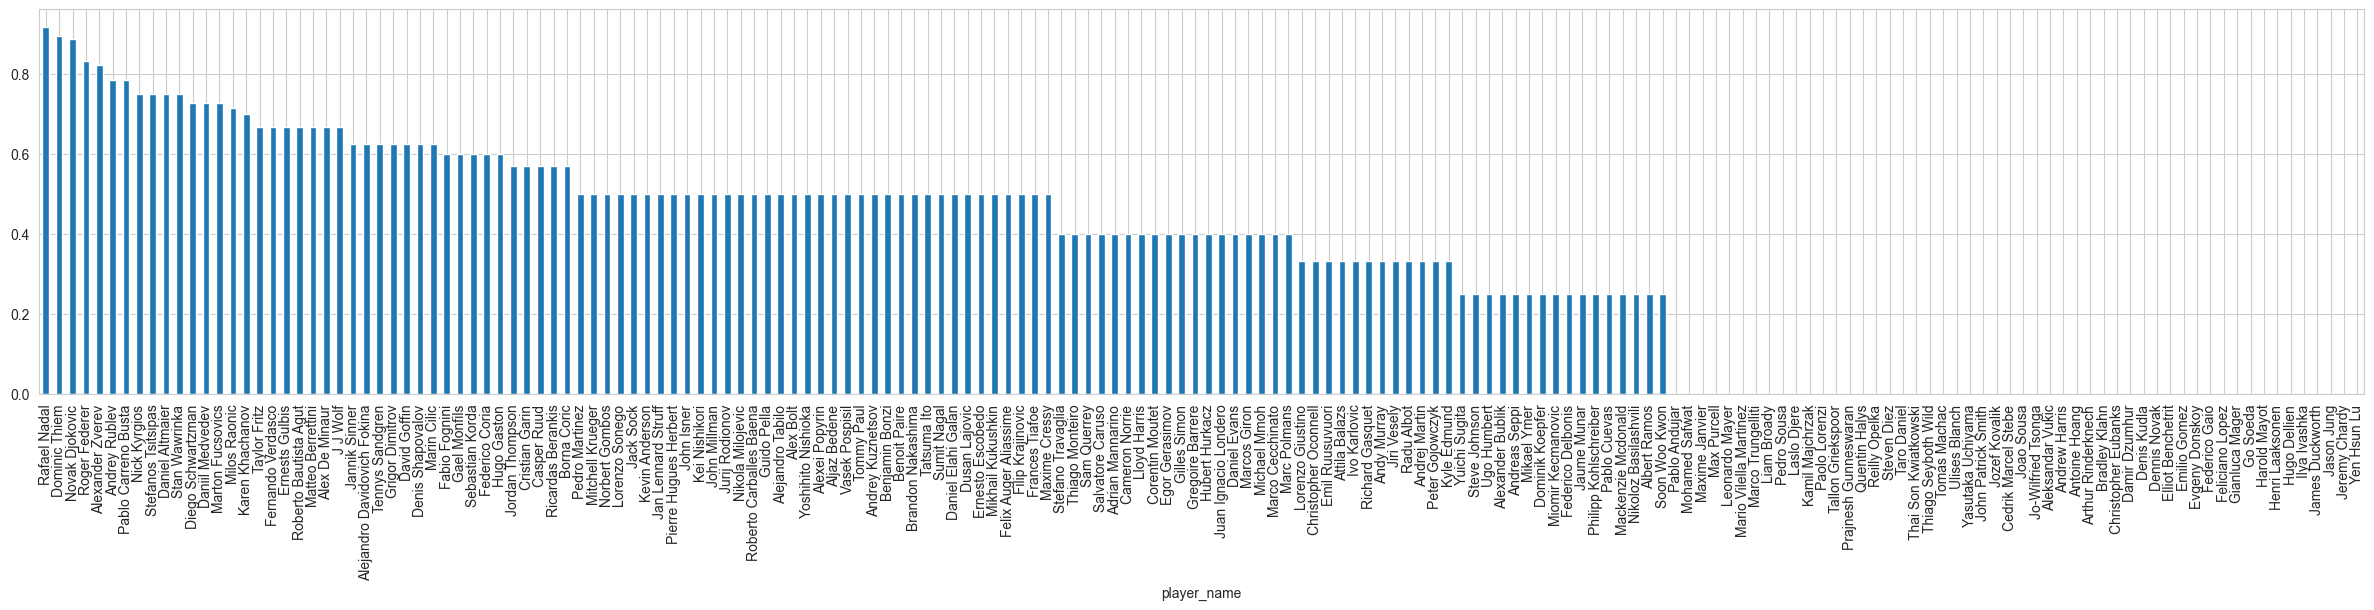

In [100]:
# Make a new df of the probability to win by win_count/game_count
# df_G_p, G means "Grand Slam", "p" means "probability"
df_G_p = df_G_players['win_count'].div(df_G_players['game_count'],axis=0)
df_G_p=pd.DataFrame(df_G_p)
df_G_p.columns=['win_rate']
df_G_p.sort_values(by='win_rate',ascending=False,inplace=True)

print(df_G_p)
# Out of 128 players, only 5 has no winning record ever, the others 123 players all have some winning records
plt.xlabel('player_name')
df_G_p['win_rate'].plot.bar(figsize=(30,5))


array([[<AxesSubplot: title={'center': 'win_rate'}>]], dtype=object)

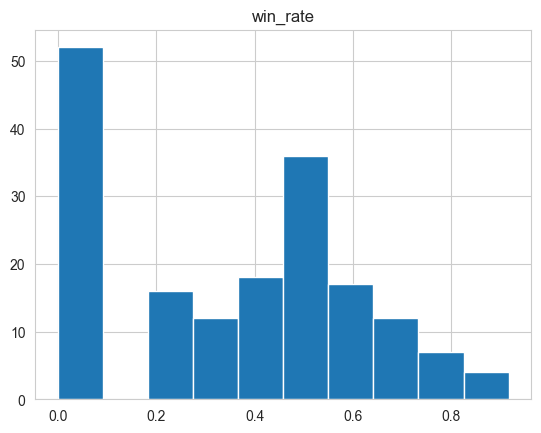

In [101]:
# The distribution of the win rate can be observed by the histogram

df_G_p.hist()
# 

We see that the top rank players has win rate over 80%, but only very few of them are in this rank.<br>
Among the players who can win, the mode is 50% win rate, meaning, most players will win and lose half-half.<br>
Given that this is a single elimination game, a 50% win rate means that the majority players will get kicked out at round 2.</br>
And there are a big numbers of players who cannot win any game. They are certainly really good players to qualify for level G.<br>
This tells us how exciting and competitive the Level G grand slam games are.<br>

### What is the actually out come of a grand slam tournament? 
Let's look at 2020 Australian Open as an example

<AxesSubplot: title={'center': 'Australian Open Wins and Losses'}>

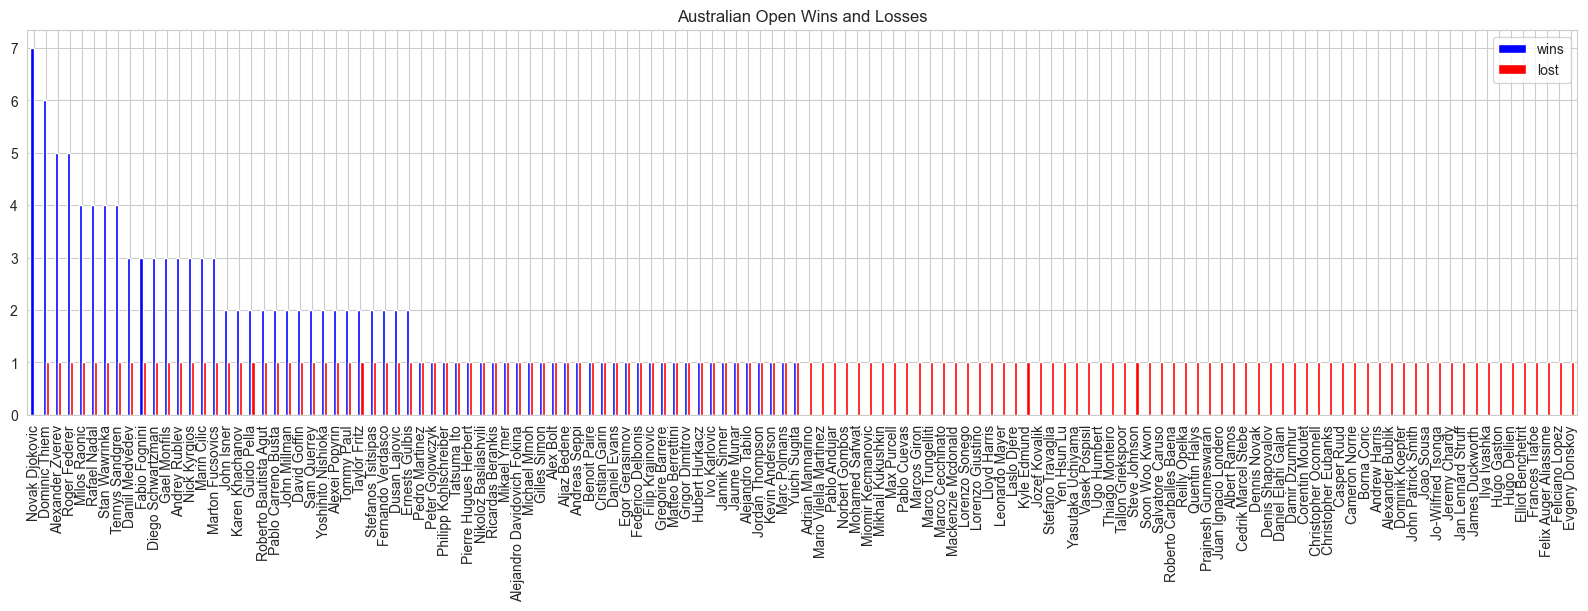

In [102]:
# Looking at this win rate data retrieved from the historical database from 2000-2023, 
# We want to comprehend more about winning and losing in a grand slam tournament
# This is to demonstrate what the outcome will be for a grand slam game
# First, read the data of 2020 from the database
url_atp_matches_2020="https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv"
df_single = pd.read_csv(url_atp_matches_2020)
# From the database, get game records of "Australian Open"
# the winners, group the games and count the numbers
df_wins_Aus=df_single.loc[(df_single['tourney_level']=='G') & (df_single['tourney_name']=='Australian Open'),:].groupby(['winner_name'])[['winner_age',]].count().sort_values(by='winner_age', ascending=False)
#print(df_wins_Aus)
# the losers, group the games and count the numbers
df_lost_Aus=df_single.loc[(df_single['tourney_level']=='G') & (df_single['tourney_name']=='Australian Open'),:].groupby(['loser_name'])[['loser_age',]].count().sort_values(by='loser_age', ascending=False)
#print(df_lost_Aus)
# combine the winner and loser record into 1 DataFrame
df_Aus=pd.concat([df_wins_Aus,df_lost_Aus],axis=1,join='outer')
df_Aus.fillna(0,inplace=True)
df_Aus.columns=['wins','lost']
# plot the DataFrame to show the result
#df_Aus.plot.bar()
df_Aus.plot.bar(title='Australian Open Wins and Losses', color=['blue', 'red'], legend=True, figsize=(20, 5))

In a real grand slam game, there are only 7 rounds. </br> 
 As it is a single elimination tournament. (https://en.wikipedia.org/wiki/Single-elimination_tournament) </br> 
Here are the names of the rounds in Wimbledon, in order: </br> 

    First round 
    Second round 
    Third round 
    Fourth round 
    Quarterfinals 
    Semifinals 
    Finals 

The first round is the first round of the tournament, and the finals is the last round of the tournament.  </br> 
The quarterfinals, semifinals, and finals are all played in a best-of-five format, meaning that the first player to win three sets wins the match. The first three rounds are all played in a best-of-three format, meaning that the first player to win two sets wins the match.

It means, Out of all 128 players, 64 will have 0 win, 32 will have 1 win, 16 will have 2 wins, 8 will have 3 wins, 4 will have 4 wins, 2 will have 5 wins, 1 will have 6 wins, and only 1, the champion, will have 7 wins. </br>
And everyone will have 1 lost, except for the champion.  

                       win_rate
Novak Djokovic         1.000000
Dominic Thiem          0.857143
Alexander Zverev       0.833333
Roger Federer          0.833333
Milos Raonic           0.800000
...                         ...
Elliot Benchetrit      0.000000
Frances Tiafoe         0.000000
Felix Auger Aliassime  0.000000
Feliciano Lopez        0.000000
Evgeny Donskoy         0.000000

[128 rows x 1 columns]


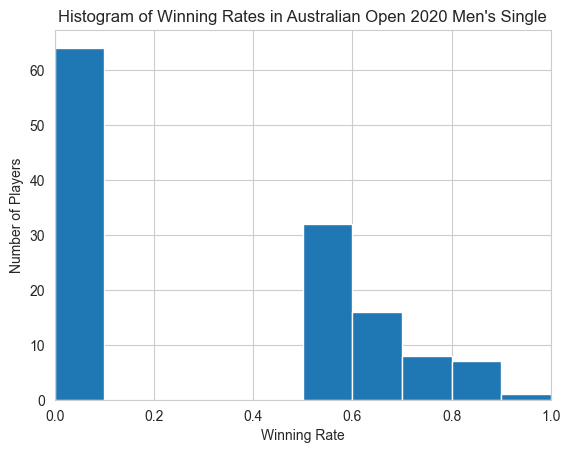

In [103]:
# So the real win rate's histogram, calculated by num_wins/num_lost will look like this:
df_Aus_p=pd.DataFrame(df_Aus['wins']/(df_Aus['wins']+df_Aus['lost']))
df_Aus_p.columns=['win_rate']
print(df_Aus_p)
# use `.pyplot.figure` (Here, specifically, the figure "subplot") to create the Figure.
fig_Aus_2020, ax_Aus_2020 = plt.subplots()
# Create the histogram
ax_Aus_2020.hist(df_Aus_p, bins=10)
# Set the x-interval
ax_Aus_2020.set_xlim([0, 1])
# Set the general layout
ax_Aus_2020.set_title('Histogram of Winning Rates in Australian Open 2020 Men\'s Single')
ax_Aus_2020.set_xlabel('Winning Rate')
ax_Aus_2020.set_ylabel('Number of Players')
# Show the plot
plt.show()

Even though, the win rate in a real game will look like this, it is completely related to the setting of the game</br>
A player's final win rate in a real game depends on which round he will most likely reach</br> 
In light of this, it is meaningful to study the number of games a player can win in a tournament.</br>
Therefore, a Binomial distribution is a reasonable model for this kind of game.</br>
Where the result is the number of games a player can win out of 7 </br>

### Modeling, Step 1,   Choosing an appropriate distribution</br>
We will use the win_rate of all the Grand Slam players as our prior, in our Beyesian model</br>
But for the model distribution, we have some problem: </br>
There are many players who get no wins in the whole year. It's sad. But it makes our data's histogram look wierd.</br>
There is a high accumulation on zero win rate. This does not mean that these players are not good enough, only that they are not fortunate enough.</br>
We need to take care of this very high population of zero win rate players in our model. </br>
Looking through all the discrete distributions in PyMC5.1.2, we found the wonderful **Zero-Inflated Binomial** distriution.</br>
This distribution is an improvement to a conventional binomial distribution. And it is perfect for our data here.</br>
For 2 reasons:</br>
1. Beside the conventional parameters p (win rate) and n (total games played), there is another parameter **psi** introduced. </br> 
**psi** represents the probability that a player will get at least one win, to be included in the binomial distribution.</br>
In another word, **1-psi** represents the probability that a player will get no win at all.</br>
2. The win rate of a player is actually not a continuous distribution, but discrete. It is calculated by win_counts/all_games.</br>
In one year, the maximum number of Grand Slam games one player can play is 4*7 = 28 games. There are limited number of win rate we can get.</br>
If each game is a Bernoulli event, then the total number of wins out of 7 games is naturally a binomial distribution. </br>

In [240]:
with pm.Model() as zib_model:
    zib_dist1=pm.ZeroInflatedBinomial('zib_dist1',psi=0.1,p=0.5,n=7)
    zib_dist5=pm.ZeroInflatedBinomial('zib_dist5',psi=0.5,p=0.5,n=7)
    zib_dist7=pm.ZeroInflatedBinomial('zib_dist7',psi=0.7,p=0.5,n=7)
    zib_dist8=pm.ZeroInflatedBinomial('zib_dist8',psi=0.8,p=0.5,n=7)
    zib_dist9=pm.ZeroInflatedBinomial('zib_dist9',psi=0.9,p=0.5,n=7)
    zib_dist10=pm.ZeroInflatedBinomial('zib_dist10',psi=0.95,p=0.5,n=7)

In [242]:
# draw 1000 posterior samples
with zib_model:
    zib_dist_sample_data = pm.sample(500,chains=1)

Sampling 1 chain for 1_000 tune and 500 draw iterations (1_000 + 500 draws total) took 3 seconds.
c:\Users\samwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (500) than draws (6). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


<Figure size 1200x5000 with 0 Axes>

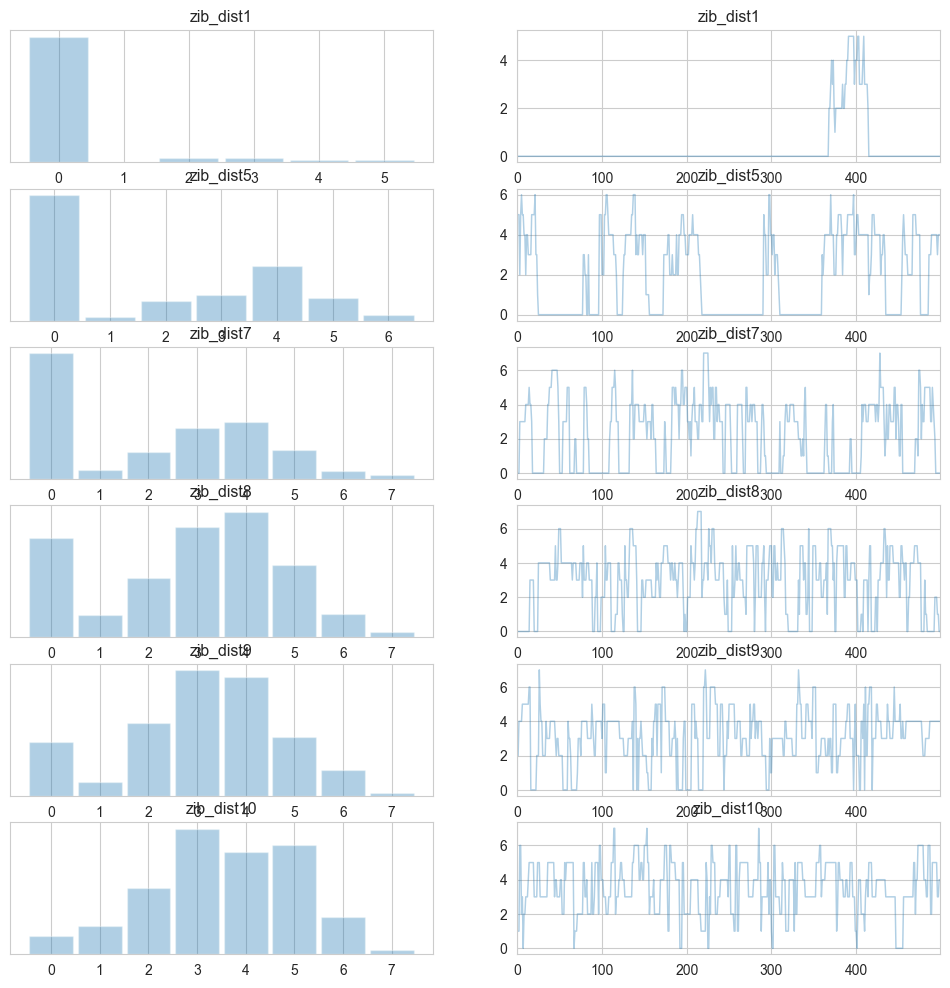

<Figure size 1200x5000 with 0 Axes>

In [247]:
az.plot_trace(zib_dist_sample_data, combined=True);
plt.figure(figsize=(12,50))


### Let's comprehend this graph a bit, important hint to how to set the prior
From the graphs above, we saw how the value of p changes the shape of the distribution.

When p is 0.5, similar to a real game, where half of the players got knocked out from the 1st round's lose, there is going to be a high peak for the zero population.
When p is 0.95, meaning, %95 players are experienced, who had a least one grand slam win in the history, and only 5% are unexperienced, the distribution looks more like a regular binomial distribution.

array([[<AxesSubplot: title={'center': 'win_rate'}>]], dtype=object)

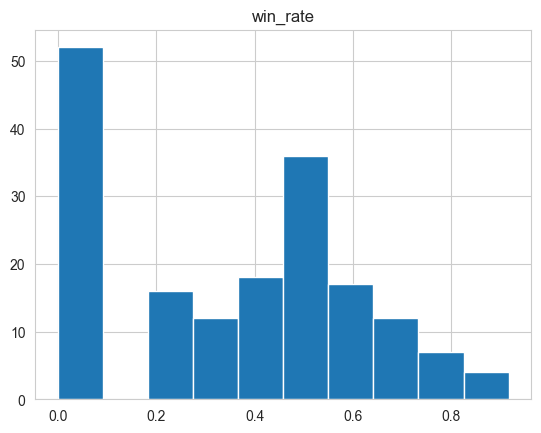

In [107]:
# Let's take a look at the 2020 grand slam distribution again
df_G_p.hist()

Looking at the sample above, we are excited that **the zero-inflated binomial distribution is able to resemble the histogram of our win rate data**.

### Modeling, Step 2: setting up PyMC parameters
 We will use Zero-inflated Binomial distribution to model the win rate of all the players.</br>
 Zero-inflated Binomial distribution has 3 parameters: psi, p and n</br>
 The parameter **psi** is the over-dispersion parameter, indicating the Expected proportion of Binomial (non-zero) variates; </br>
 The parameter **p** represents the probability of success for each trial; </br>
 The parameter **n** represents the total number of trials.</br>

 In this model, **psi**, **p**, are both non-deterministic, as we do not know how many players will win no game, and how the average win rate shall be.
 But **n** shall be a constant 7. </br>
 Because in a read Grand Slam game there are 128 draws, </br>
 and 4 round-robin tournament games (rr) + 1 quater final (qf) + 1 semi final (sf) + 1 final (f) = 7 games </br>

#### A discussion about  **psi**</br>

The meaning of **PSI** is the ratio of players who can win at least one game out of 7. </br>
In a 128-draw game, 64 players will be knocked out after the 1st round and will have no win. The ratio is 1/2. </br>
If there is only 1 Grand Slam game, psi = 0.5, it is deterministic.</br>
But there are 4 Grand Slam games every year. </br> 
And sometimes 3, such as the year 2020. Because of COVID-19 pandemic, the Wimbledon Championship was cancelled. </br>
https://www.cnn.com/2020/04/01/tennis/wimbledon-canceled-coronavirus-2020-spt-intl/index.html</br>
If a player only join one Grand Slam game, his chance of getting no win will be 50%.</br>
If he joins 2 Grand Slam games, his chance of getting no win will become 50%*50% = 25%. </br>
If he joins all 4 games, this chance is lowered to 1/16 = 7.25%. </br>
But there are too many different factors on this number, making it hard to predict. </br>
At least, we can find out what psi is for 2020, with only 3 Grand Slam games.</br>


In [108]:
# To find out psi, we would find out how may players did win at least one game
# because psi represents the proportion of the binomial part
n_have_win = df_G_p[df_G_p['win_rate']!=0].count() # 
print("n_have_win: ", int(n_have_win)) # = 122
# And find the total number of players
n_all_players = df_G_p.count()
print("n_all_players: ", int(n_all_players)) # = 174
# the value of psi suggested by the data
psi_observed = float(n_have_win/n_all_players)
print('psi_observed: ', psi_observed) # approximately 0.7

n_have_win:  122
n_all_players:  174
psi_observed:  0.7011494252873564


Therefore, it is reasonable to model psi as a distribution.</br>
This distrinution will have a mean value of 0.7, and it should be very likely to be around this number. </br>
Meaning, the standard deviation shall be very small. </br>
It's natural to use a normal distribution to describe such a quantity.</br>

In [109]:
with pm.Model() as win_rate_2020_model:
    psi_2020 = pm.Normal('psi_2020',mu = 0.7,sigma = 0.05)

#### A discussion about  **p**</br>
The probability for a player to win a game in a Grand Slam game is for sure not deterministic. </br>
In fact, this probability varies a lot, depending on the players and the opponents they meet, and the round in the game. </br>
Seed players have much higher probabilities to win a game, than non seeded players. </br>
And sometimes, odd event happens...</br>
Novak Djokovic knocked out of Wimbledon by Sam Querrey</br>
https://www.theguardian.com/sport/2016/jul/02/novak-djokovic-knocked-out-wimbledon-sam-querrey</br>
So, we have no idea what this p will be. It can be anything from 0-1.</br>
But consider p as an average quantity of all players, a reasonable central tendency shall be 0.5. </br>
Because if the probability Novak Djokovic beats Sam Querrey is as high as 99%,</br>
then the probability Sam Querrey beats Novak Djokovic is 1%, which did happen.</br> 
And the average probability between them 2 will be (1%+99%)/2=50%!</br>
And these 2 probability shall be equally distant to 50%.</br>
This makes Student's T distribution a good candidate to represent the distribution of win rate **p**.</br>
For 2 reasons as well:</br>
    1. Student's T distribution is an improvement to normal distribution. It has a symmetric distribution around the peak.</br>
    2. Student's T distribution is designed to allow values far off the average to appear. So that Sam Querrey will have fair opportunity to beat Djokovic the first round.</br>

Considering that we do not know how dispersed the win rate shall be from 50%, it is reasonable to model the sigma as a distribution where we do not have any knowledge. The uniform distribution.</br>
Hence, we adopted a hierachical model.</br>

In [110]:
with win_rate_2020_model:
    sigma4p_2020 = pm.Uniform('sigma4p_2020',lower=0.01, upper=0.5)
    p_2020 = pm.StudentT('p_2020',nu=10, mu=0.5, sigma=sigma4p_2020)

Here, we need to pay attention to value of nu. It's set nu =5.</br>
In the previous study, i. e. our homework assignment 10, we have already stated that </br>
for Student's T distribution, when the dimensional parameter nu <= 1, the distribution will not be able to coverge and normalize. </br>
We learned from "Bayesian Analysis with Python_ Introduction to statistical modeling and probabilistic programming using PyMC3 and ArviZ" </br>
by Osvaldo Martin, page 59 (https://www.amazon.com/Bayesian-Analysis-Python-Osvaldo-Martin/dp/1785883801) </br>
that <mark>"A very curious feature of the Student's t- distribution is that it has no defined mean when nu<=1"</mark>, </br>
which means that the distribution will reach infinity. Theoretically, this is inapproapriate.</br>
As the PyMC manual showed nu=1 and nu=5, 2 options, we chose nu=5 for our study.</br>
https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.StudentT.html</br>

### n is a constant number 7. 

In [111]:
with win_rate_2020_model:
    n_2020=7

## Step 3: Prepare the obedience data
The prior distribution is the win rate of all players df_G_p. </br>
However, to fit the discrete binomial distribution, and the possible outcome of the samplying, </br>
the win rate shall be turned into possible nunber of games win. </br>

In [112]:
df_G_prior=df_G_p*7
df_G_prior

win_rate
player_name               
Rafael Nadal      6.416667
Dominic Thiem     6.263158
Novak Djokovic    6.222222
Roger Federer     5.833333
Alexander Zverev  5.764706
...                    ...
Ilya Ivashka      0.000000
James Duckworth   0.000000
Jason Jung        0.000000
Jeremy Chardy     0.000000
Yen Hsun Lu       0.000000

[174 rows x 1 columns]

### Step 3: Finish the modeling

In [113]:
with win_rate_2020_model:
    # Define prior
    zero_inflated_binomial = pm.ZeroInflatedBinomial('zero_inflated_binomial', psi=psi_2020, p=p_2020, n=n_2020, observed = df_G_prior)

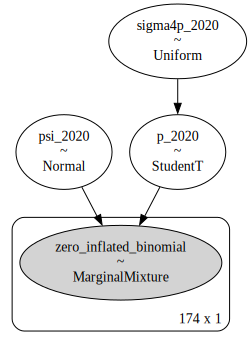

In [114]:
# Show the graphviz diagram of the structure of our single hierachy model
pm.model_to_graphviz(win_rate_2020_model)

### Step 4: sampling

In [115]:
with win_rate_2020_model:
    trace_2020=pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [psi_2020, sigma4p_2020, p_2020]
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 112 seconds.


Let's graph the samplys:

array([[<AxesSubplot: title={'center': 'psi_2020'}>,
        <AxesSubplot: title={'center': 'psi_2020'}>],
       [<AxesSubplot: title={'center': 'p_2020'}>,
        <AxesSubplot: title={'center': 'p_2020'}>],
       [<AxesSubplot: title={'center': 'sigma4p_2020'}>,
        <AxesSubplot: title={'center': 'sigma4p_2020'}>]], dtype=object)

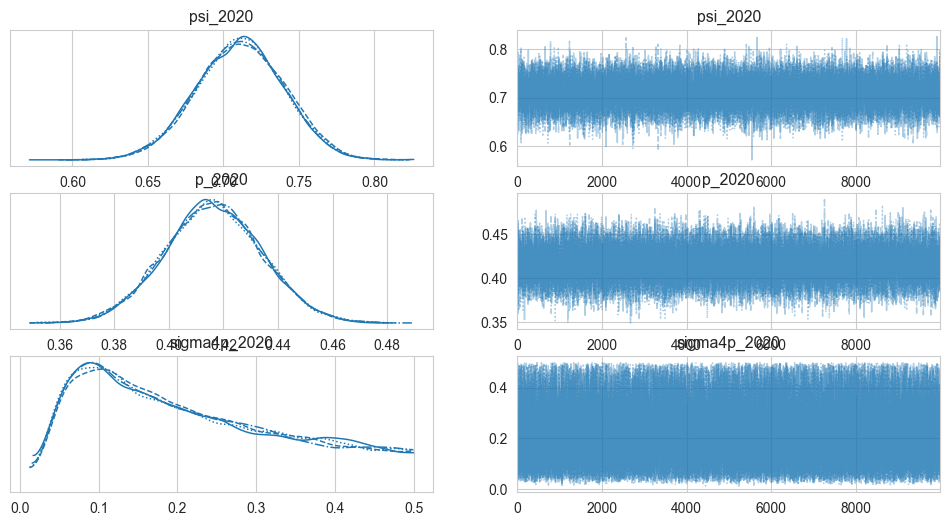

In [116]:
az.plot_trace(trace_2020)

### Plot the energy
The az.plot_energy() function in PyMC plots the energy of the trace as a function of the number of iterations. The energy is a measure of how well the model fits the data, and it is typically minimized during the MCMC sampling process. If the energy is decreasing steadily over time, then the sampler is converging. If the energy is not decreasing, or if it is oscillating, then the sampler may not be converging.

<AxesSubplot: >

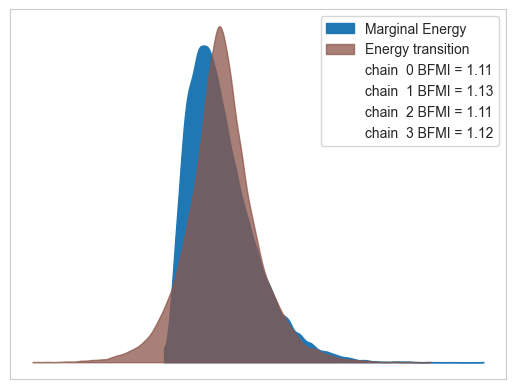

In [117]:
# Plot the energy
az.plot_energy(trace_2020)

The momentum resampling in a Hamiltonian Markov transition induceso of the change of energies (energy transition) is similar to the marginal energy distribution, therefore, our model will allow a Hamiltonian Markov chain to randomly walk across level sets. And this
random walk will rapidly explore all relevant energies and the resulting Hamiltonian Markov chain will enjoy small autocorrelations.

The Hamilton Energy check ensure that the zero-inflated Binomial distribution is a good model for this study.
 	
https://doi.org/10.48550/arXiv.1604.00695</br>
arXiv:1604.00695 [stat.ME]</br>
https://arxiv.org/pdf/1604.00695.pdf</br>

# ***Part 1: The cancelled game: 2020 Wimbledon Championships***</br>
The 2020 Wimbledon Championships, a Grand Slam tennis tournament, was scheduled to take place at the All England Lawn Tennis and Croquet Club in Wimbledon, London, United Kingdom, from June 29 to July 12, 2020. However, it was cancelled due to the COVID-19 pandemic. The cancellation was announced on April 1, 2020. This was the first time since World War II that the Wimbledon Championships were cancelled.

https://en.wikipedia.org/wiki/2020_Wimbledon_Championships</br>

We will assume that those who joined 2021 Wimbledon would have joined 2020 Wimbledon if it was held. Utilizing the data of all the Grand Slam games since 2020, we demonstrate a work of modeling to simulate the cancelled game and how the final ranking will most probably be.

In [118]:
# Get the players who joined 2021 Wimbledon
# first, locate the data file
url_atp_matches_2021="https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv"
# read as a pandas dataFrame df_single_G_2021
df_single_G_2021 = pd.read_csv(url_atp_matches_2021) 
# narrow down to all the Grand Slam G level games
df_single_G_2021 = df_single_G_2021.loc[df_single_G_2021['tourney_level']=='G',:]
print('There are totally', len(df_single_G_2021), ' G-level grand slam games in 2021')           
# further narrow down to those 2021 Wimbledon games
df_single_Wimbledon_2021 = df_single_G_2021.loc[df_single_G_2021['tourney_name']=='Wimbledon',:]
print('There are totally', len(df_single_Wimbledon_2021), ' Wimbledon games in 2021')
# Get all the player names
list_all_2021_Wimbledon_players = list(set(df_single_Wimbledon_2021['winner_name']).union(set(df_single_Wimbledon_2021['loser_name'])))
print('There are totally', len(list_all_2021_Wimbledon_players), 'players in 2021 Wimbledon games')

There are totally 508  G-level grand slam games in 2021
There are totally 127  Wimbledon games in 2021
There are totally 128 players in 2021 Wimbledon games


In [119]:
# Now try to read all the data since 2000, for a better statistics of these 128 players.
# Set the repository owner and name
owner = 'JeffSackmann'
repo = 'tennis_atp'
# Set the API endpoint
url = f'https://api.github.com/repos/{owner}/{repo}/contents'
# Send a GET request to the API endpoint
response = requests.get(url)
# Get the JSON response
data = response.json()
# Get a list of all files in the repository
files = [item['name'] for item in data if item['type'] == 'file']
# Shrink the list down to all the files of ATP level games after 2000
files = [file_name for file_name in files if re.search('atp_matches_20',file_name)]
# Print the head and end of the list of files
print('There are ', len(files), ' files matching the search!')
print(files[1],files[-1])



There are  24  files matching the search!
atp_matches_2001.csv atp_matches_2023.csv


In [120]:
# Get the url of these files
url_atp_matches=["https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/" + file_name for file_name in files]
# and show the first and last urls
url_atp_matches[1],url_atp_matches[-1]

('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2001.csv',
 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv')

In [200]:
# Build a huge data frame of all the games since 2000
df_single_G_since_2000 = pd.concat([pd.read_csv(url) for url in url_atp_matches])
# check out the huge data frame: df_single_G_since_2000
print('There are ', len(df_single_G_since_2000),' tennis game records since 2020')
# narrow down to all the G level games
df_single_G_since_2000 = df_single_G_since_2000.loc[df_single_G_since_2000["tourney_level"]=='G',:]
# check the size again
print('There are ', len(df_single_G_since_2000),' grand slam G -level tennis game records since 2020')


There are  69838  tennis game records since 2020
There are  11684  grand slam G -level tennis game records since 2020


In [122]:
# sanity check, make sure the "df_single_G_since_2000" is correctly established
dict_games_by_year = {int(re.search(r'20'+r'\d{2}',url).group()):len(pd.read_csv(url).loc[pd.read_csv(url)['tourney_level']=='G',:]) for url in url_atp_matches}
print('On 2000, there are ', dict_games_by_year[2000], ' games played')
print('On 2020, there are ', dict_games_by_year[2020], ' games played')
print('On 2023, there are ', dict_games_by_year[2023], ' games played')   
# It looks like that only 2020 Wimbledon was cancelled since 2000, while only one out of four grand Slam events has been held in 2023.
# Usually, every year there will be 508 G level games played, including the 4 grand slams, 
# But 2020 has 127 games missing, because of the cancellation of Wimbledon, and 2023 has only 127 played for now.
# And confirmed that the "df_single_G_since_2000" dataFrame is getting the correct entries

On 2000, there are  508  games played
On 2020, there are  381  games played
On 2023, there are  127  games played


In [123]:
# Continue to narrow down the related data
# Now pick all the games played by the 128 players in 2021 Wimbledon. Those in 'list_all_2021_Wimbledon_players'
df_single_G_since_2000 = df_single_G_since_2000.loc[df_single_G_since_2000['winner_name'].isin(list_all_2021_Wimbledon_players)|df_single_G_since_2000['loser_name'].isin(list_all_2021_Wimbledon_players),:]
# The expression above is a bit-wise OR using "|" instead of a single value or operation like the alternative statement below
#df_single_G_since_2000 = df_single_G_since_2000.loc[[(i[0] or i[1]) for i in zip(df_single_G_since_2000['winner_name'].isin(list_all_2021_Wimbledon_players),df_single_G_since_2000['loser_name'].isin(list_all_2021_Wimbledon_players))],:]
len(df_single_G_since_2000)

5568

In [124]:
# Get the total count of all games won  and lost for each player
# Get the count of games won by each player
df_single_G_since_2000_wincount=df_single_G_since_2000.loc[:,['tourney_date','winner_name']].groupby('winner_name').count()
# Change the column name to 'wins'
df_single_G_since_2000_wincount.columns=['wins']
# Get the count of games lost by each player
df_single_G_since_2000_lostcount=df_single_G_since_2000.loc[:,['tourney_date','loser_name']].groupby('loser_name').count()
# Change the column name to 'lost'
df_single_G_since_2000_lostcount.columns=['lost']
print(df_single_G_since_2000_wincount)
print(df_single_G_since_2000_lostcount)
type(df_single_G_since_2000_lostcount)

                   wins
winner_name            
Adam Pavlasek         1
Adrian Mannarino     39
Agustin Calleri       2
Albert Costa          1
Albert Montanes       2
...                 ...
Yosuke Watanuki       1
Younes El Aynaoui     1
Yuichi Sugita         4
Zachary Svajda        1
Zdenek Kolar          1

[378 rows x 1 columns]
                          lost
loser_name                    
Adam Pavlasek                3
Adrian Mannarino            51
Adrian Menendez Maceiras     1
Adrian Ungur                 3
Agustin Calleri              1
...                        ...
Zdenek Kolar                 2
Ze Zhang                     1
Zhe Li                       1
Zhizhen Zhang                3
Zizou Bergs                  2

[596 rows x 1 columns]


pandas.core.frame.DataFrame

In [125]:
# sanity check, the total number of game won shall equal the total number of games lost
df_single_G_since_2000_wincount.sum(), df_single_G_since_2000_lostcount.sum()

(wins    5568
 dtype: int64,
 lost    5568
 dtype: int64)

In [126]:
# Connect (concat) the wins and losts DataFrames by column (axis=1) keeping rows with missing match (join='outer')
df_single_G_since_2000_win_lost=pd.concat([df_single_G_since_2000_wincount,df_single_G_since_2000_lostcount],axis=1,join='outer')
# Auto fill the NaN with 0
df_single_G_since_2000_win_lost.fillna(0,inplace=True)
# And then find the sum of win and los and add to the 3rd column
df_single_G_since_2000_win_lost=pd.concat([df_single_G_since_2000_win_lost,df_single_G_since_2000_win_lost.sum(axis=1)],axis=1)
# Rename the 3rd columns
df_single_G_since_2000_win_lost.columns=['wins','lostt','all']
# Behold, the DataFrame of the win vs lost account for all players in grand Slam in 21 century!
df_single_G_since_2000_win_lost

wins  lostt   all
Adam Pavlasek      1.0    3.0   4.0
Adrian Mannarino  39.0   51.0  90.0
Agustin Calleri    2.0    1.0   3.0
Albert Costa       1.0    1.0   2.0
Albert Montanes    2.0   10.0  12.0
...                ...    ...   ...
Yuki Bhambri       0.0    2.0   2.0
Ze Zhang           0.0    1.0   1.0
Zhe Li             0.0    1.0   1.0
Zhizhen Zhang      0.0    3.0   3.0
Zizou Bergs        0.0    2.0   2.0

[609 rows x 3 columns]

In [127]:
# Filter the "df_single_G_since_2000_win_lost" DataFrame, leave only those joined 2021 Wimbledon
df_single_G_since_2000_win_lost=df_single_G_since_2000_win_lost.loc[df_single_G_since_2000_win_lost.index.isin(list_all_2021_Wimbledon_players),:]
df_single_G_since_2000_win_lost

wins  lostt   all
Adrian Mannarino             39.0   51.0  90.0
Albert Ramos                 25.0   45.0  70.0
Alejandro Davidovich Fokina  15.0   12.0  27.0
Alex Bolt                     5.0    8.0  13.0
Alex De Minaur               30.0   22.0  52.0
...                           ...    ...   ...
Daniel Masur                  0.0    1.0   1.0
Pedro Sousa                   0.0    4.0   4.0
Tomas Barrios Vera            0.0    2.0   2.0
Yasutaka Uchiyama             0.0    7.0   7.0
Zhizhen Zhang                 0.0    3.0   3.0

[128 rows x 3 columns]

### Behold, Our obersved data df_single_G_since_2000!

In [182]:
# Get the win rate of all 2021 players as the prior of our model
# Make a new df of the probability to win by win_count/game_count
# df_G_p, G means "Grand Slam", "p" means "probability"
df_single_G_since_2000_p = df_single_G_since_2000_win_lost['wins']/df_single_G_since_2000_win_lost['all']
# We like DataFrame more than Series
df_single_G_since_2000=pd.DataFrame(df_single_G_since_2000_p.sort_values(ascending=False))
# Rename the column 'win_rate'
df_single_G_since_2000.columns=['win_rate']
# Here is our prior
df_single_G_since_2000

win_rate
Novak Djokovic      0.879487
Roger Federer       0.863426
Andy Murray         0.788845
Carlos Alcaraz      0.774194
Daniil Medvedev     0.728395
...                      ...
Daniel Masur        0.000000
Pedro Sousa         0.000000
Tomas Barrios Vera  0.000000
Yasutaka Uchiyama   0.000000
Zhizhen Zhang       0.000000

[128 rows x 1 columns]

<AxesSubplot: xlabel='player_name'>

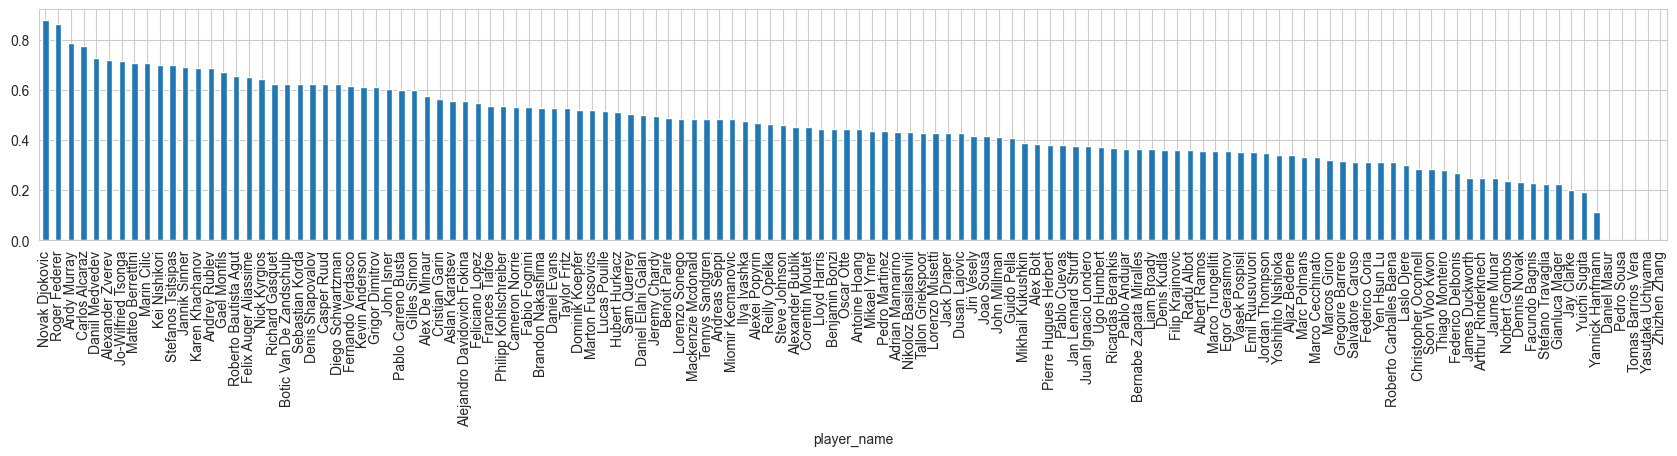

In [187]:
# Out of 128 players, only 5 has no winning record ever, the others 123 players all have some winning records
plt.xlabel('player_name')
#plt.yticks([i for i in df_G_p.index])
df_single_G_since_2000['win_rate'].plot.bar(figsize=(21,3))

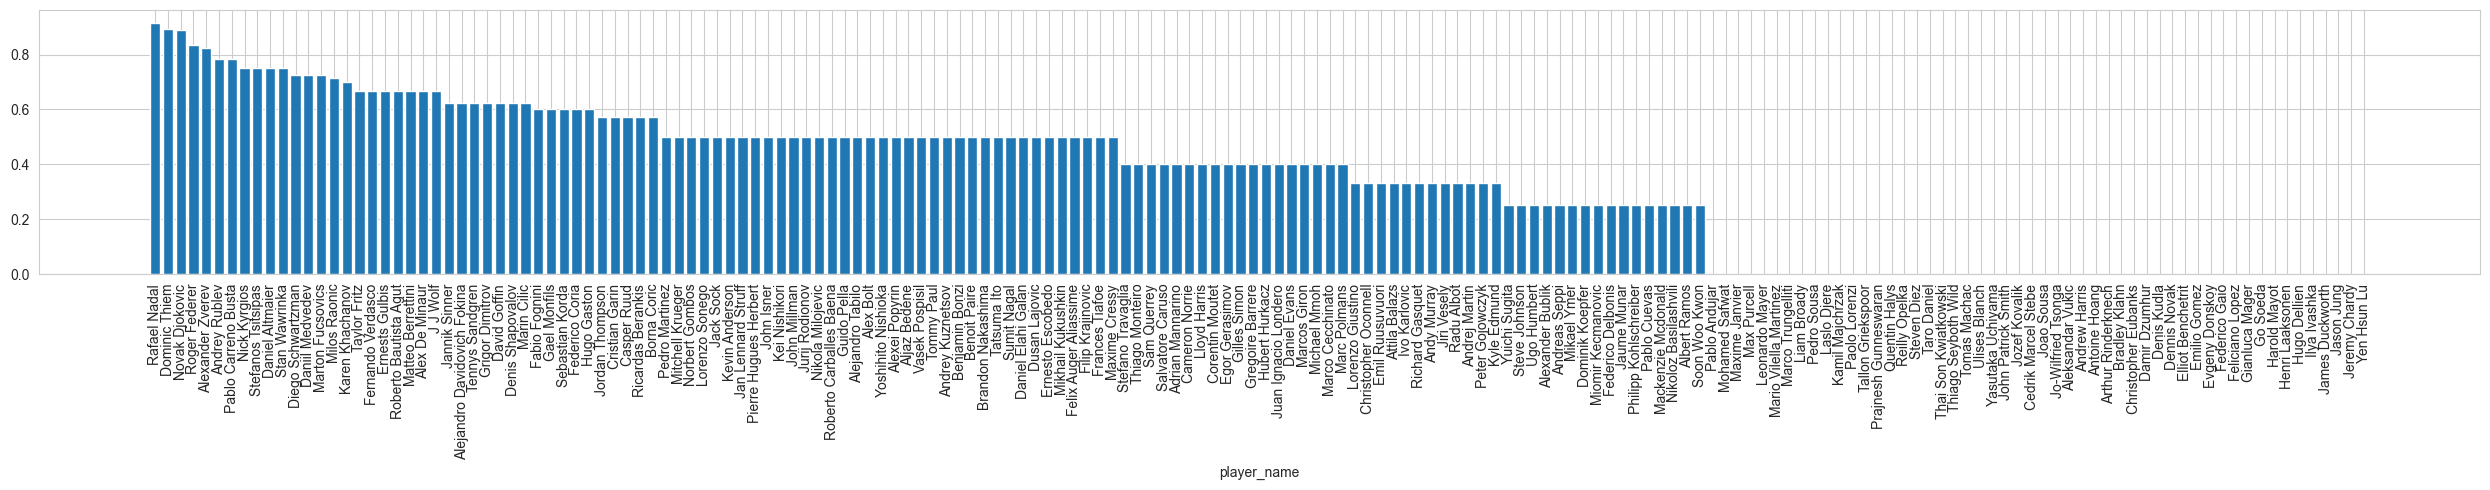

In [130]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt


# plot the bar chart
fig, ax = plt.subplots(figsize=(25, 5))
ax.bar(df_G_p.index, df_G_p['win_rate'])

# rotate the xticks
plt.setp(ax.get_xticklabels(), rotation=90)

# set the xlabel
ax.set_xlabel('player_name')

# make the plot scrollable and bigger
plt.tight_layout()

# display the plot
plt.show()

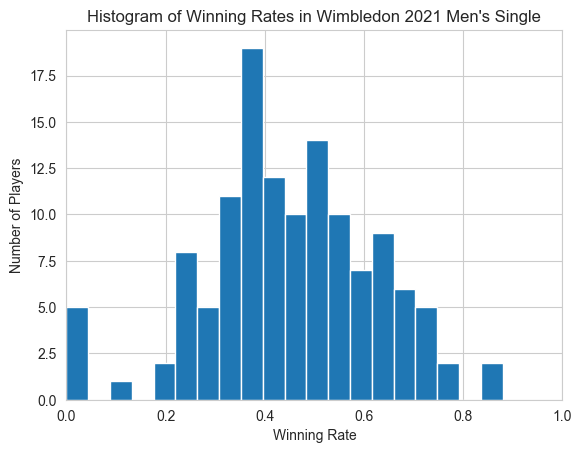

In [131]:
# Now we would use OO-style code in matplotlib to plot the histogram of our prior
# If not yet imported, carry out 
# import matplotlib.pyplot as plt
# use `.pyplot.figure` (Here, specifically, the figure "subplot") to create the Figure.
fig_hist_df_G_p, ax_df_G_p = plt.subplots()
# Create the histogram
ax_df_G_p.hist(df_single_G_since_2000['win_rate'], bins=20)
# Set the x-interval
ax_df_G_p.set_xlim([0, 1])
# Set the general layout
ax_df_G_p.set_title('Histogram of Winning Rates in Wimbledon 2021 Men\'s Single')
ax_df_G_p.set_xlabel('Winning Rate')
ax_df_G_p.set_ylabel('Number of Players')
# Show the plot
plt.show()

Now we will go ahead and use the proven model "zero-inflated binomial" to build a model for the 2020 Wimbledon men's single.
Assuming that these 2021 Wimbledon players are those who would have joined 2020 Wimbledon game.

But one thing we will change is the cut off proportion, because the data set here has already changed from only 1 year to more than 20 years</br>
This makes the zero part significantly lower.</br>
Only those who are completely new for 2021 Wimbledon game, such as the Chinese player Zhizhen Zhang, will have a 0 win rate,<\br> 
otherwise, most players have some experience here and there, that they could make some victories in grand slam.<\br>

In [132]:
# To find out psi for the year 2020, we would find out how may players did win at least one game
# because psi represents the proportion of the binomial part
n_have_win = df_single_G_since_2000[df_single_G_since_2000['win_rate']!=0].count() # 
print("n_have_win: ", int(n_have_win)) # = 123
# And find the total number of players
n_all_players = df_single_G_since_2000.count()
print("n_all_players: ", int(n_all_players)) # = 128
# the value of psi suggested by the data
psi_observed = float(n_have_win/n_all_players)
print('psi_observed: ', psi_observed) # approximately 0.96

n_have_win:  123
n_all_players:  128
psi_observed:  0.9609375


In [133]:
# Here is our prior
df_G_Wimbledon2020_prior=df_single_G_since_2000*7.0
df_G_Wimbledon2020_prior

win_rate
Novak Djokovic      6.156410
Roger Federer       6.043981
Andy Murray         5.521912
Carlos Alcaraz      5.419355
Daniil Medvedev     5.098765
...                      ...
Daniel Masur        0.000000
Pedro Sousa         0.000000
Tomas Barrios Vera  0.000000
Yasutaka Uchiyama   0.000000
Zhizhen Zhang       0.000000

[128 rows x 1 columns]

In [134]:
# Here is our prior
df_G_Wimbledon2020_prior=df_single_G_since_2000*7.0
# And modeling
with pm.Model() as Wimbledon2020:
    psi_Wimbledon2020 = pm.Normal('psi_Wimbledon2020',mu = 0.96,sigma = 0.05)
    sigma4p_Wimbledon2020 = pm.Uniform('sigma4p_Wimbledon2020',lower=0.01, upper=0.5)
    p_Wimbledon2020 = pm.StudentT('p_Wimbledon2020',nu=5, mu=0.5, sigma=sigma4p_Wimbledon2020)
    n_Wimbledon2020 = 7
    posterior_Wimbledon2020 = pm.ZeroInflatedBinomial('posterior_Wimbledon2020', psi=psi_Wimbledon2020, p=p_Wimbledon2020, n=n_Wimbledon2020, observed = df_G_Wimbledon2020_prior)


In [135]:
with Wimbledon2020:
    trace_Wimbledon2020=pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [psi_Wimbledon2020, sigma4p_Wimbledon2020, p_Wimbledon2020]
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 124 seconds.


array([[<AxesSubplot: title={'center': 'psi_Wimbledon2020'}>,
        <AxesSubplot: title={'center': 'psi_Wimbledon2020'}>],
       [<AxesSubplot: title={'center': 'p_Wimbledon2020'}>,
        <AxesSubplot: title={'center': 'p_Wimbledon2020'}>],
       [<AxesSubplot: title={'center': 'sigma4p_Wimbledon2020'}>,
        <AxesSubplot: title={'center': 'sigma4p_Wimbledon2020'}>]],
      dtype=object)

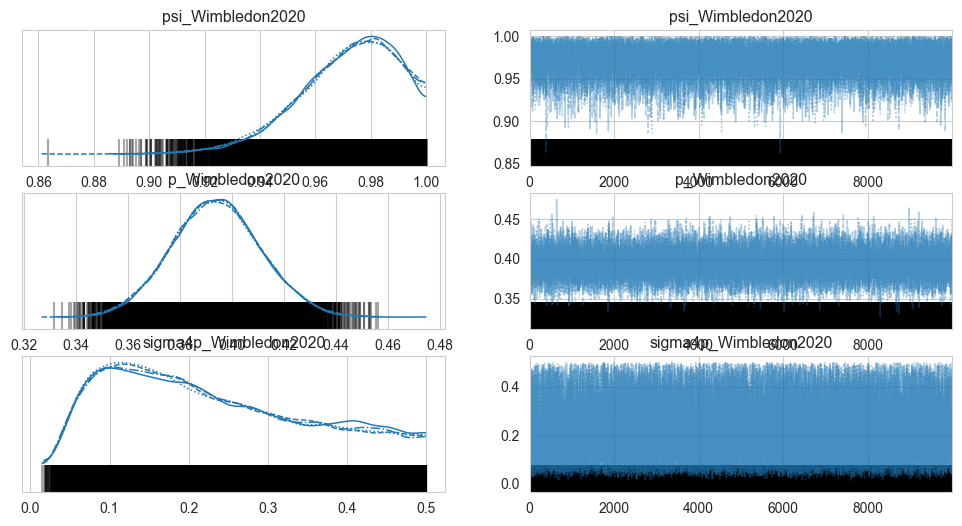

In [136]:
az.plot_trace(trace_Wimbledon2020)

<AxesSubplot: >

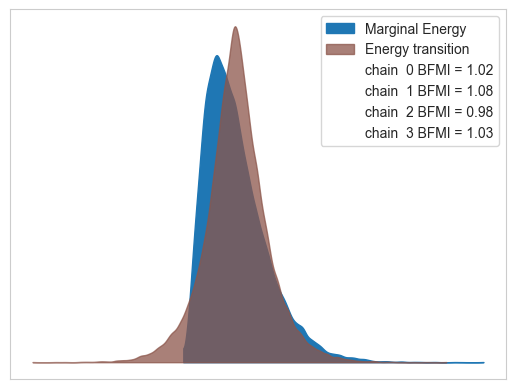

In [137]:
# Plot the energy
az.plot_energy(trace_Wimbledon2020)

In [138]:
# We’ll use PyMC’s dedicated function to sample data from the posterior for a posterior predictive check. 
# This function will randomly draw 4000 samples of parameters from the trace. Then, for each sample, 
# it will draw 100 random numbers from a normal distribution specified by the values of mu and sigma in that sample:

# https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html
RANDOM_SEED = 58
rng = np.random.default_rng(RANDOM_SEED)
with Wimbledon2020:
    pm.sample_posterior_predictive(trace_Wimbledon2020, extend_inferencedata=True, random_seed=rng)

Sampling: [posterior_Wimbledon2020]


In [139]:
trace_Wimbledon2020

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [140]:
# Now, the posterior_predictive group in idata contains 4000 generated data sets (containing 100 samples each), 
# each using a different parameter setting from the posterior:
# https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html
posterior_predictive=trace_Wimbledon2020.posterior_predictive
posterior_predictive

<xarray.Dataset>
Dimensions:                        (chain: 4, draw: 10000,
                                    posterior_Wimbledon2020_dim_2: 128,
                                    posterior_Wimbledon2020_dim_3: 1)
Coordinates:
  * chain                          (chain) int32 0 1 2 3
  * draw                           (draw) int32 0 1 2 3 ... 9996 9997 9998 9999
  * posterior_Wimbledon2020_dim_2  (posterior_Wimbledon2020_dim_2) int32 0 .....
  * posterior_Wimbledon2020_dim_3  (posterior_Wimbledon2020_dim_3) int32 0
Data variables:
    posterior_Wimbledon2020        (chain, draw, posterior_Wimbledon2020_dim_2, posterior_Wimbledon2020_dim_3) int64 ...
Attributes:
    created_at:                 2023-04-24T09:43:43.053804
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  5.0.2

In [141]:
posterior_predictive.posterior_Wimbledon2020

<xarray.DataArray 'posterior_Wimbledon2020' (chain: 4, draw: 10000,
                                             posterior_Wimbledon2020_dim_2: 128,
                                             posterior_Wimbledon2020_dim_3: 1)>
array([[[[3],
         [2],
         [2],
         ...,
         [4],
         [0],
         [4]],

        [[3],
         [4],
         [4],
         ...,
         [1],
         [3],
         [1]],

        [[4],
         [2],
         [4],
         ...,
...
         ...,
         [3],
         [4],
         [3]],

        [[2],
         [3],
         [5],
         ...,
         [1],
         [2],
         [6]],

        [[3],
         [4],
         [2],
         ...,
         [4],
         [3],
         [3]]]], dtype=int64)
Coordinates:
  * chain                          (chain) int32 0 1 2 3
  * draw                           (draw) int32 0 1 2 3 ... 9996 9997 9998 9999
  * posterior_Wimbledon2020_dim_2  (posterior_Wimbledon2020_dim_2) int32 0 .....
  * posterior_Wimbledon2020_dim_3  (posterior_Wimbledon2020_dim_3) int32 0

<AxesSubplot: xlabel='posterior_Wimbledon2020 / posterior_Wimbledon2020'>

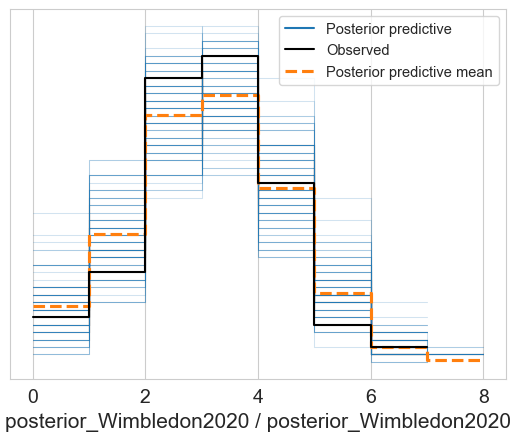

In [142]:
# One common way to visualize is to look if the model can reproduce the patterns observed in the real data. 
# ArviZ has a really neat function to do that out of the box:
# https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html
az.plot_ppc(trace_Wimbledon2020, num_pp_samples=100)

In [143]:
posterior_predictive=az.extract(posterior_predictive, num_samples=100)
posterior_predictive

<xarray.Dataset>
Dimensions:                        (posterior_Wimbledon2020_dim_2: 128,
                                    posterior_Wimbledon2020_dim_3: 1,
                                    sample: 100)
Coordinates:
  * posterior_Wimbledon2020_dim_2  (posterior_Wimbledon2020_dim_2) int32 0 .....
  * posterior_Wimbledon2020_dim_3  (posterior_Wimbledon2020_dim_3) int32 0
  * sample                         (sample) object MultiIndex
  * chain                          (sample) int32 3 1 2 0 1 0 3 ... 0 1 2 0 2 2
  * draw                           (sample) int32 2165 8776 4231 ... 3521 9554
Data variables:
    posterior_Wimbledon2020        (posterior_Wimbledon2020_dim_2, posterior_Wimbledon2020_dim_3, sample) int64 ...
Attributes:
    created_at:                 2023-04-24T09:43:43.053804
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  5.0.2

### Model validity:
From the diagram above, we can see that the posterior predictive mean is resembling the observed data. The historic win rate of the players in a grand slam game is able to draw samples similar to the prior distribution.


# ***Part 2. Ace and 1stIn***

In [144]:
# remember that the DataFrame we have the 24 data files
df_all_games_since_2000 = pd.concat([pd.read_csv(url) for url in url_atp_matches])

In [145]:
# Get all the Grand Slam Games
df_G_game_since_2000 = df_all_games_since_2000.loc[df_all_games_since_2000['tourney_level']=='G',:]

In [146]:
# See the size of our data
len(df_G_game_since_2000)
# It should be 11684 * 2, because each game has winner and loser

11684

In [147]:
# See all the columns we have:
df_G_game_since_2000.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

**Game play related records:**</br>
w_ace: The number of aces hit by the winning player.</br>
w_df: The number of double faults hit by the winning player.</br>
w_svpt: The number of service points played by the winning player.</br>
w_1stIn: The percentage of first serves that landed in for the winning player.</br>
w_1stWon: The percentage of first serve points won by the winning player.</br>
w_2ndWon: The percentage of second serve points won by the winning player.</br>
w_SvGms: The number of service games won by the winning player.</br>
w_bpSaved: The number of break points saved by the winning player.</br>
w_bpFaced: The number of break points faced by the winning player.</br>

Here, we can consider these game play records reflect certain apsect of training for the players.</br>
And we would like to use a linear regression model to study how important each aspect is, so that the players can be trained accordingly.</br>
And to start with the model, we would come pair 2 aspects first,  "ace" and "df" </br>
We would like to see whether it is more important to train to get ace, meaning, more aggressive service</br>
Or more important to train to avoid double fault, meaning, more conservative service</br>

### Building a Bayesian Power Model


We will follow the approach of the F1 mid-term homework, model the win rate expectation $\theta$ of each player as an exponential of *two* independent variables: a ace variable **ace**, and a double fault variable **dft**, times a constant factor k:

$$θ_c = k_c * e^{\text{ace}_c} * e^{\text{dft}_c}$$

The reason why we have a ${\text{dft}_c}$ is that the contribution of double fault is negative, losing point and service round.</br>

We use an exponential to increase the effect of each indendent variable,  but we will use $log(\theta)$ to simplify to a linear model!

Parameters are initially modeled with a log-linear random effect model, a standard procedure in sports analytics.

$$\log(θ) = log(k) + \text{ace}_c + \text{dft}_c $$  

we create two *new* columns: $\text{att}_g$ and $\text{def}_g$.  

Let's assume results are determined jointly by ace and double fault, an aggregation of the talent of attack and defense, represented by parameters `ace` and `dft`, respectively.

For each player, race result $c = 1, \cdots, C$, player-specific `ace` and `dft` effects will be modelled by a common normal distribution:
$ace_c \propto \text{Normal}(μ_{ace},τ_{ace})$ and $dft_c \propto \text{Normal}(μ_{dft}, τ_{dft})$.

We will initialize $μ_{ace}$ and $μ_{dft}$ to 0, which is a common action in mcmc simulations for modeling likelihood parameter pdfs.

As for $\sigma_{ace}$ and $\sigma_{dft}$, we will initialize them to half-Student-t distributions. The half-Student-t parameters will be set to match the data's.

We will build our model in `PyMC`, specifying global parameters, player-specific parameters, and the likelihood function.

Ok, so the reference data we want to consider are the win rate for each player in `df_G_game_since_2000`.

In [148]:
# Get the winners data, change the column names, for concatenation
df_winners_since_2000=df_G_game_since_2000[['winner_id','w_ace','w_df']]
df_winners_since_2000.columns=['player_id','ace','dft']
# Get the losers data, change the column names, for concatenation
df_losers_since_2000=df_G_game_since_2000[['loser_id','l_ace','l_df']]
df_losers_since_2000.columns=['player_id','ace','dft']
# Concatenate the 2 DataFrames
df_players_since_2000=pd.concat([df_winners_since_2000,df_losers_since_2000],axis=0)
df_players_since_2000

player_id   ace  dft
2130     101736   8.0  3.0
2131     102344  11.0  4.0
2132     103181   9.0  5.0
2133     102644   2.0  4.0
2134     103454   5.0  1.0
...         ...   ...  ...
282      126094   6.0  3.0
283      210097  24.0  6.0
284      111575  10.0  1.0
285      126205   4.0  0.0
286      126774  15.0  3.0

[23368 rows x 3 columns]

#### Changes

In [149]:
# Get the winners data, change the column names, for concatenation
df_winners_since_2000=df_G_game_since_2000[['winner_id','w_ace','w_1stWon']]
df_winners_since_2000.columns=['player_id','ace','dft']
# Get the losers data, change the column names, for concatenation
df_losers_since_2000=df_G_game_since_2000[['loser_id','l_ace','l_1stWon']]
df_losers_since_2000.columns=['player_id','ace','dft']
# Concatenate the 2 DataFrames
df_players_since_2000=pd.concat([df_winners_since_2000,df_losers_since_2000],axis=0)
df_players_since_2000

player_id   ace   dft
2130     101736   8.0  49.0
2131     102344  11.0  27.0
2132     103181   9.0  66.0
2133     102644   2.0  37.0
2134     103454   5.0  30.0
...         ...   ...   ...
282      126094   6.0  39.0
283      210097  24.0  71.0
284      111575  10.0  62.0
285      126205   4.0  24.0
286      126774  15.0  50.0

[23368 rows x 3 columns]

In [150]:
df_players_wins_since_2000=df_winners_since_2000.groupby('player_id').count()[['ace',]]
# change the colume names
df_players_wins_since_2000.columns=['win_count']

df_players_loses_since_2000=df_losers_since_2000.groupby('player_id').count()[['ace',]]
# change the colume names
df_players_loses_since_2000.columns=['lose_count']

df_players_stats=pd.concat([df_players_wins_since_2000,df_players_loses_since_2000],axis=1,join='outer').fillna(0)
# and then find the sum of win and los and add to the 3rd column
df_players_stats=pd.concat([df_players_stats,df_players_stats.sum(axis=1)],axis=1)
# rename the 3rd columns
df_players_stats.columns=['win_count','los_count','game_count']
df_players_stats

win_count  los_count  game_count
player_id                                  
100644          72.0         28       100.0
101086           1.0          3         4.0
101150           6.0          8        14.0
101185           1.0          2         3.0
101320           2.0          6         8.0
...              ...        ...         ...
208071           0.0          1         1.0
208233           0.0          1         1.0
209070           0.0          1         1.0
209414           0.0          1         1.0
210530           0.0          1         1.0

[869 rows x 3 columns]

### We can see that there are 869 players who played in grand slam games since 2000. 

In [151]:
win_aces = df_winners_since_2000.groupby('player_id').median()
win_aces.columns=['win_aces_m','win_df_m']

loss_aces = df_losers_since_2000.groupby('player_id').median()
loss_aces.columns=['loss_aces_m','loss_df_m']

total_win_aces = df_winners_since_2000.groupby('player_id').sum()
total_win_aces.columns=['total_win_aces','total_win_df_m']

total_lose_aces = df_losers_since_2000.groupby('player_id').sum()
total_lose_aces.columns=['total_loss_aces_m','total_loss_df_m']

df_players_stats= pd.concat([df_players_stats,win_aces],axis=1,join='outer').fillna(0.0)

df_players_stats= pd.concat([df_players_stats,loss_aces],axis=1,join='inner').fillna(0.0)

df_players_stats= pd.concat([df_players_stats,total_win_aces],axis=1,join='outer').fillna(0.0)

df_players_stats= pd.concat([df_players_stats,total_lose_aces],axis=1,join='inner').fillna(0.0)

df_players_stats['win_aces_m'] = df_players_stats['win_aces_m'].replace(0.0, 0.01)
df_players_stats['win_df_m'] = df_players_stats['win_df_m'].replace(0.0, 0.01)
df_players_stats['loss_aces_m'] = df_players_stats['loss_aces_m'].replace(0.0, 0.01)
df_players_stats['loss_df_m'] = df_players_stats['loss_df_m'].replace(0.0, 0.01)

df_players_stats['total_win_aces'] = df_players_stats['total_win_aces'].replace(0.0, 0.01)
df_players_stats['total_win_df_m'] = df_players_stats['total_win_df_m'].replace(0.0, 0.01)
df_players_stats['total_loss_aces_m'] = df_players_stats['total_loss_aces_m'].replace(0.0, 0.01)
df_players_stats['total_loss_df_m'] = df_players_stats['total_loss_df_m'].replace(0.0, 0.01)

In [152]:
df_players_stats

win_count  los_count  game_count  win_aces_m  win_df_m  \
player_id                                                           
100644          72.0         28       100.0       14.00     53.00   
101086           1.0          3         4.0        2.00     57.00   
101150           6.0          8        14.0       13.50     44.00   
101185           1.0          2         3.0        3.00     37.00   
101320           2.0          6         8.0        7.00     41.50   
...              ...        ...         ...         ...       ...   
208071           0.0          1         1.0        0.01      0.01   
208233           0.0          1         1.0        0.01      0.01   
209070           0.0          1         1.0        0.01      0.01   
209414           0.0          1         1.0        0.01      0.01   
210530           0.0          1         1.0        0.01      0.01   

           loss_aces_m  loss_df_m  total_win_aces  total_win_df_m  \
player_id                                                           
100644             9.5       57.5          984.00         4019.00   
101086             2.0       43.0            2.00           57.00   
101150             5.0       37.0           79.00          250.00   
101185             2.5       38.5            3.00           37.00   
101320             3.5       32.5           14.00           83.00   
...                ...        ...             ...             ...   
208071             9.0       51.0            0.01            0.01   
208233             9.0       58.0            0.01            0.01   
209070             9.0       57.0            0.01            0.01   
209414             1.0       25.0            0.01            0.01   
210530             5.0       49.0            0.01            0.01   

           total_loss_aces_m  total_loss_df_m  
player_id                                      
100644                 310.0           1584.0  
101086                  11.0            120.0  
101150                  55.0            300.0  
101185                   5.0             77.0  
101320                  23.0            246.0  
...                      ...              ...  
208071                   9.0             51.0  
208233                   9.0             58.0  
209070                   9.0             57.0  
209414                   1.0             25.0  
210530                   5.0             49.0  

[869 rows x 11 columns]

In [153]:
df_players_winrate_ace=pd.DataFrame((df_players_stats['win_aces_m'] * (df_players_stats['win_count']/df_players_stats['game_count']))/((df_players_stats['win_aces_m'] * (df_players_stats['win_count']/df_players_stats['game_count']))+(df_players_stats['loss_aces_m'] * (df_players_stats['los_count']/df_players_stats['game_count']))))
df_players_winrate_ace.columns=['wins_aces_factor']
df_players_winrate_ace.sort_index(ascending=False, inplace=True)
df_players_winrate_ace.replace(0.000000, 0.000001)

wins_aces_factor
player_id                  
210530             0.000001
210234             0.750000
210097             0.566038
210013             0.038462
209414             0.000001
...                     ...
101320             0.400000
101185             0.375000
101150             0.669421
101086             0.250000
100644             0.791209

[869 rows x 1 columns]

In [154]:
df_players_winrate_df=pd.DataFrame(((df_players_stats['win_df_m'] * (df_players_stats['win_count']/df_players_stats['game_count']))/((df_players_stats['win_df_m'] * (df_players_stats['win_count']/df_players_stats['game_count']))+(df_players_stats['loss_df_m'] * (df_players_stats['los_count']/df_players_stats['game_count'])))))
df_players_winrate_df.columns=['wins_df_factor']
df_players_winrate_df.sort_index(ascending=False, inplace=True)
df_players_winrate_df.replace(0.000000, 0.000001)

wins_df_factor
player_id                
210530           0.000001
210234           0.672897
210097           0.594458
210013           0.198198
209414           0.000001
...                   ...
101320           0.298561
101185           0.324561
101150           0.471429
101086           0.306452
100644           0.703281

[869 rows x 1 columns]

In [155]:
df_players_stats= pd.concat([df_players_stats,df_players_winrate_ace],axis=1,join='inner')

df_players_stats= pd.concat([df_players_stats,df_players_winrate_df],axis=1,join='inner')
df_players_stats.replace(0.000000, 0.000001)
df_players_stats


win_count  los_count  game_count  win_aces_m  win_df_m  \
player_id                                                           
100644          72.0         28       100.0       14.00     53.00   
101086           1.0          3         4.0        2.00     57.00   
101150           6.0          8        14.0       13.50     44.00   
101185           1.0          2         3.0        3.00     37.00   
101320           2.0          6         8.0        7.00     41.50   
...              ...        ...         ...         ...       ...   
208071           0.0          1         1.0        0.01      0.01   
208233           0.0          1         1.0        0.01      0.01   
209070           0.0          1         1.0        0.01      0.01   
209414           0.0          1         1.0        0.01      0.01   
210530           0.0          1         1.0        0.01      0.01   

           loss_aces_m  loss_df_m  total_win_aces  total_win_df_m  \
player_id                                                           
100644             9.5       57.5          984.00         4019.00   
101086             2.0       43.0            2.00           57.00   
101150             5.0       37.0           79.00          250.00   
101185             2.5       38.5            3.00           37.00   
101320             3.5       32.5           14.00           83.00   
...                ...        ...             ...             ...   
208071             9.0       51.0            0.01            0.01   
208233             9.0       58.0            0.01            0.01   
209070             9.0       57.0            0.01            0.01   
209414             1.0       25.0            0.01            0.01   
210530             5.0       49.0            0.01            0.01   

           total_loss_aces_m  total_loss_df_m  wins_aces_factor  \
player_id                                                         
100644                 310.0           1584.0          0.791209   
101086                  11.0            120.0          0.250000   
101150                  55.0            300.0          0.669421   
101185                   5.0             77.0          0.375000   
101320                  23.0            246.0          0.400000   
...                      ...              ...               ...   
208071                   9.0             51.0          0.000000   
208233                   9.0             58.0          0.000000   
209070                   9.0             57.0          0.000000   
209414                   1.0             25.0          0.000000   
210530                   5.0             49.0          0.000000   

           wins_df_factor  
player_id                  
100644           0.703281  
101086           0.306452  
101150           0.471429  
101185           0.324561  
101320           0.298561  
...                   ...  
208071           0.000000  
208233           0.000000  
209070           0.000000  
209414           0.000000  
210530           0.000000  

[869 rows x 13 columns]

And, we will build the win rate DataFrame as well

In [156]:
df_players_winrate_avg=pd.DataFrame((df_players_stats['wins_aces_factor']+df_players_stats['wins_df_factor'])/2).replace(0.000000, 0.000001)
df_players_winrate_avg.columns=['wins_rate']
df_players_winrate_avg.sort_index(ascending=False, inplace=True)
df_players_winrate_avg

wins_rate
player_id           
210530      0.000001
210234      0.711449
210097      0.580248
210013      0.118330
209414      0.000001
...              ...
101320      0.349281
101185      0.349781
101150      0.570425
101086      0.278226
100644      0.747245

[869 rows x 1 columns]

There are ***too many*** of them. As we tried to do a simulation of all these players, the time taken ended up to be more than 1 hour. 
We decided to cut down the list of players to the most recent ones, who joined 2023 Austrailian Open.


In [157]:
url_atp_matches_2023="https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv"
df_single_2023 = pd.read_csv(url_atp_matches_2023)
df_winners_2023 = df_single_2023.loc[df_single_2023['tourney_level']=='G',['winner_name','winner_id']]
df_winners_2023.columns=['name','id']
df_losers_2023 = df_single_2023.loc[df_single_2023['tourney_level']=='G',['loser_name','loser_id']]
df_losers_2023.columns=['name','id']
df_winner_loser_2023 = pd.concat([df_losers_2023,df_winners_2023],axis=0)
df_players_names_2023 = df_winner_loser_2023.groupby('id').max()
df_players_names_2023

name
id                      
100644  Alexander Zverev
104527     Stan Wawrinka
104545        John Isner
104745      Rafael Nadal
104755   Richard Gasquet
...                  ...
208103      Jiri Lehecka
208233   Mattia Bellucci
209414   Luca Van Assche
210097       Ben Shelton
210234    Juncheng Shang

[128 rows x 1 columns]

In [158]:
df_players_2023=pd.concat([df_players_names_2023,df_players_winrate_avg],axis=1,join='inner')
#df_players_2023=pd.concat([df_players_2023,df_players_stats[['win_aces_m','win_df_m','loss_aces_m','loss_df_m']]],axis=1,join='inner')
df_players_2023=pd.concat([df_players_2023,df_players_stats[['win_aces_m','win_df_m']]],axis=1,join='inner')
df_players_2023.sort_values(by='wins_rate',ascending=False, inplace=True)
df_players_2023

name  wins_rate  win_aces_m  win_df_m
104925       Novak Djokovic   0.883160        7.00     46.00
104745         Rafael Nadal   0.868738        4.00     43.00
104918          Andy Murray   0.798811        9.00     43.00
200670             J J Wolf   0.789956       14.00     44.00
126610    Matteo Berrettini   0.755413       16.00     55.00
...                     ...        ...         ...       ...
144817  Marc Andrea Huesler   0.000001        0.01      0.01
106362       Laurent Lokoli   0.000001        0.01      0.01
200267          Zizou Bergs   0.000001        0.01      0.01
111190        Zhizhen Zhang   0.000001        0.01      0.01
122669  Juan Pablo Varillas   0.000001        0.01      0.01

[128 rows x 4 columns]

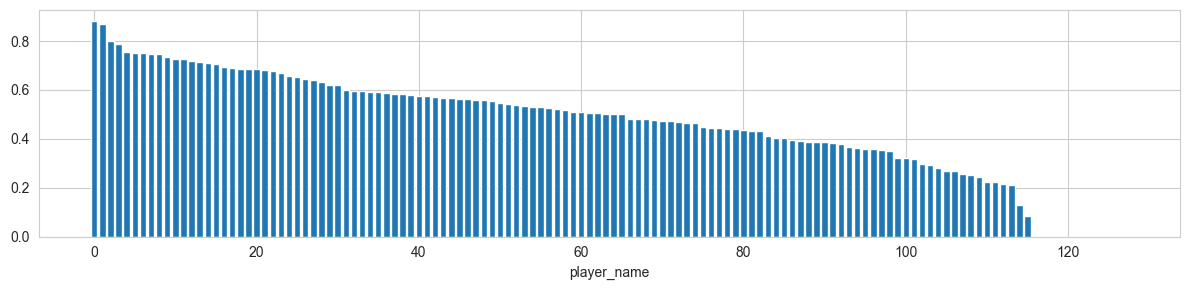

In [180]:
#Plot the win rate
fig, ax = plt.subplots(figsize=(12, 3))
ax.bar(range(len(df_players_2023)),df_players_2023['wins_rate'])


# set the xlabel
ax.set_xlabel('player_name')

# make the plot scrollable and bigger
plt.tight_layout()

# display the plot
plt.show()

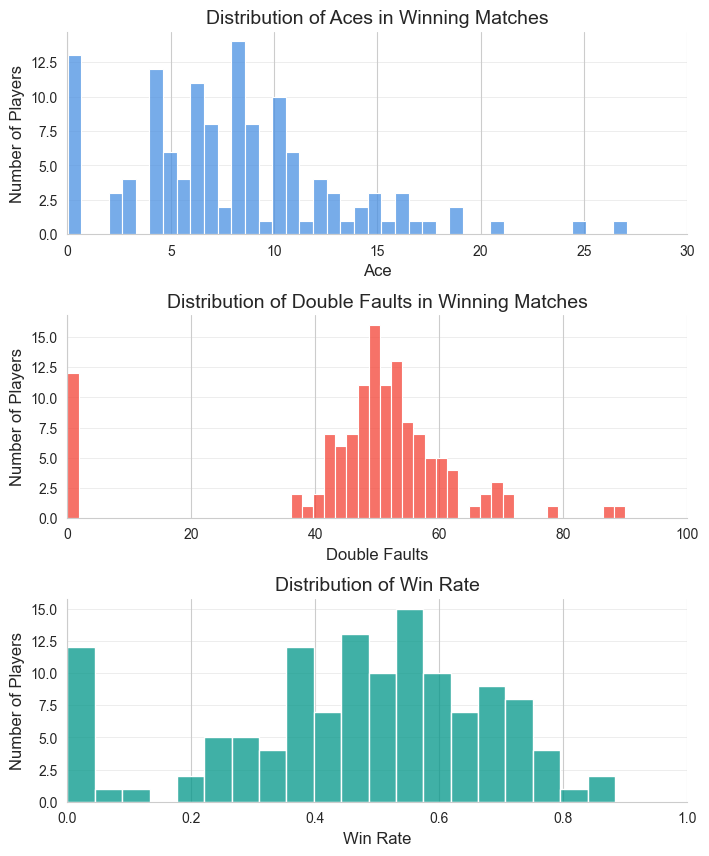

In [160]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Set colors
colors = ['#4a90e2', '#f44336', '#009688']

# Plot the histograms
sns.histplot(data=df_players_2023, x='win_aces_m', bins=50, ax=axs[0], color=colors[0])
sns.histplot(data=df_players_2023, x='win_df_m', bins=50, ax=axs[1], color=colors[1])
sns.histplot(data=df_players_2023, x='wins_rate', bins=20, ax=axs[2], color=colors[2])

# Set the x-limits
axs[0].set_xlim([0, 30])
axs[1].set_xlim([0, 100])
axs[2].set_xlim([0, 1])

# Set the titles and labels
axs[0].set_title('Distribution of Aces in Winning Matches', fontsize=14)
axs[0].set_xlabel('Ace', fontsize=12)
axs[0].set_ylabel('Number of Players', fontsize=12)

axs[1].set_title('Distribution of Double Faults in Winning Matches', fontsize=14)
axs[1].set_xlabel('Double Faults', fontsize=12)
axs[1].set_ylabel('Number of Players', fontsize=12)

axs[2].set_title('Distribution of Win Rate', fontsize=14)
axs[2].set_xlabel('Win Rate', fontsize=12)
axs[2].set_ylabel('Number of Players', fontsize=12)

# Remove the top and right spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add a horizontal grid to each plot
for ax in axs:
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


<AxesSubplot: >

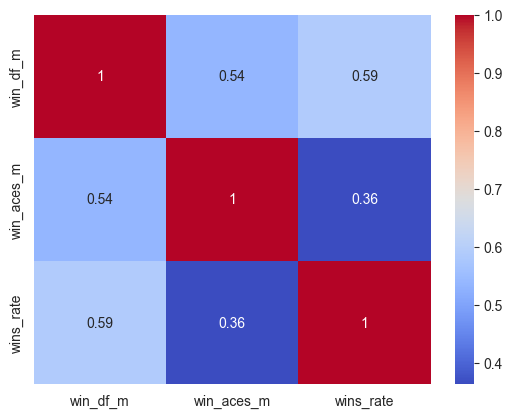

In [161]:
import seaborn as sns

# Create a subset of the data with only the columns we need
subset = df_players_2023[['win_df_m', 'win_aces_m', 'wins_rate']]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


Data is ready, now build the model

In [162]:
n_players=len(df_players_2023)
players = df_players_2023.index.values
players_ids=np.arange(len(players))
win_rates = df_players_2023['wins_rate']#.tolist()
with pm.Model() as AceDoubleFault:
    intercept = pm.Flat('intercept')
    ace_star = pm.Normal("ace_star", mu=2, sigma=pm.HalfStudentT('ace_sd', sigma=5, nu=10), shape=(n_players))
    dft_star = pm.Normal("dft_star", mu=1.5, sigma=pm.HalfStudentT('dft_sd', sigma=5, nu=10), shape=(n_players)) 
    ace = pm.Deterministic('ace', ace_star - pm.math.sum(ace_star)/n_players)
    dft = pm.Deterministic('dft', dft_star - pm.math.sum(dft_star)/n_players) 
    theta = pm.math.exp(intercept + ace[players_ids] + dft[players_ids])
    # According to the distribution above, zib is the best distribution , where n=1

    win_rate = pm.ZeroInflatedBinomial('wins_rate', psi=0.95, n=1, p=theta, observed=win_rates)   

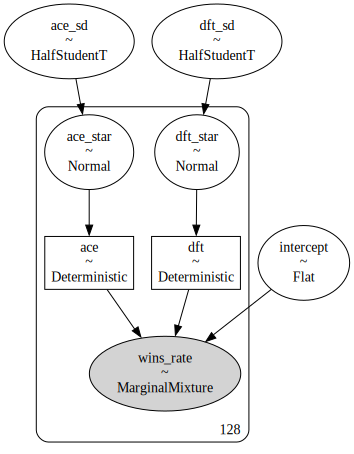

In [163]:
# Show the graphviz diagram of the structure of our single hierachy model
pm.model_to_graphviz(AceDoubleFault)

#### BE CAREFUL, THE SIMULATION BELOW TAKES MORE THAN 1 HOUR TO RUN!

In [164]:
with AceDoubleFault:
    trace_AD = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, ace_sd, ace_star, dft_sd, dft_star]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 342 seconds.


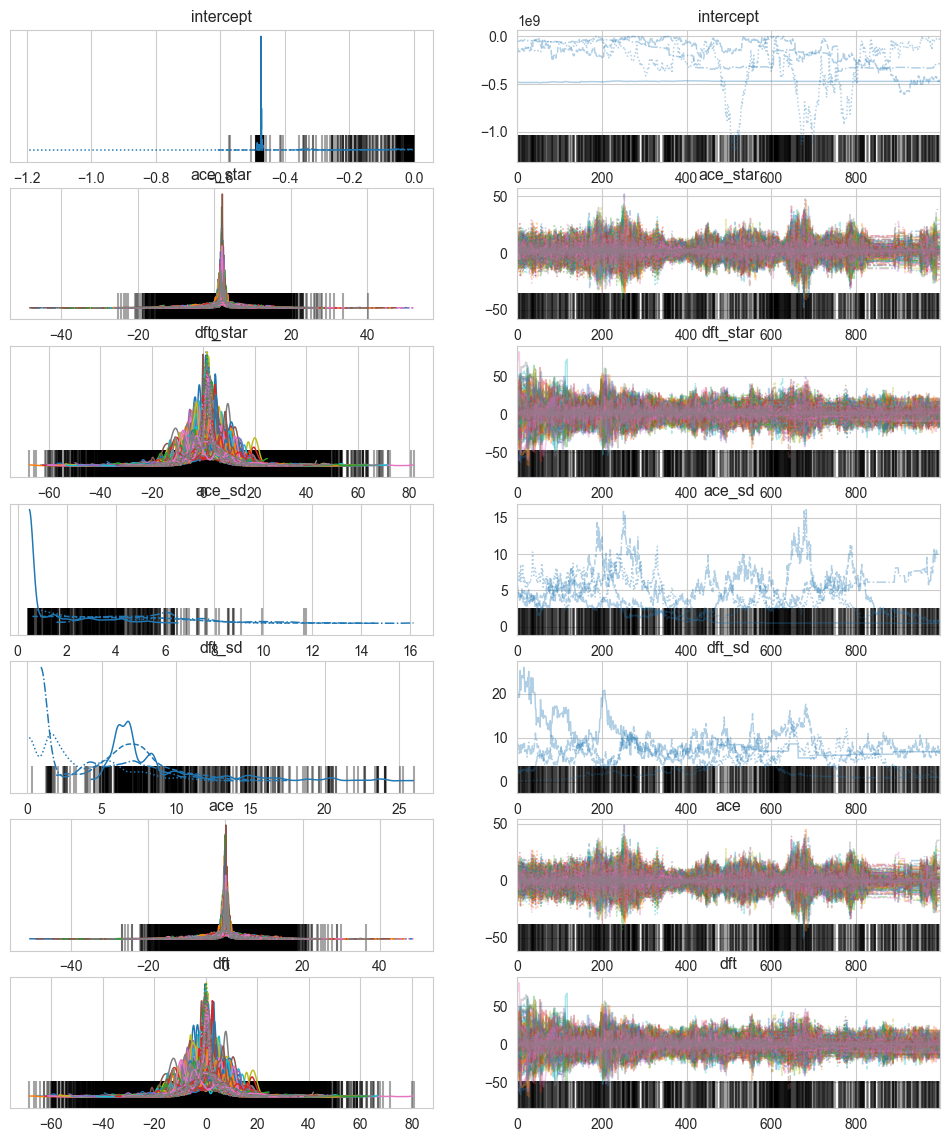

In [165]:
with AceDoubleFault:
    az.plot_trace(trace_AD)
    AD_summary = az.summary(trace_AD, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, ace_sd, ace_star, dft_sd, dft_star]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 80 seconds.


<Figure size 1000x600 with 0 Axes>

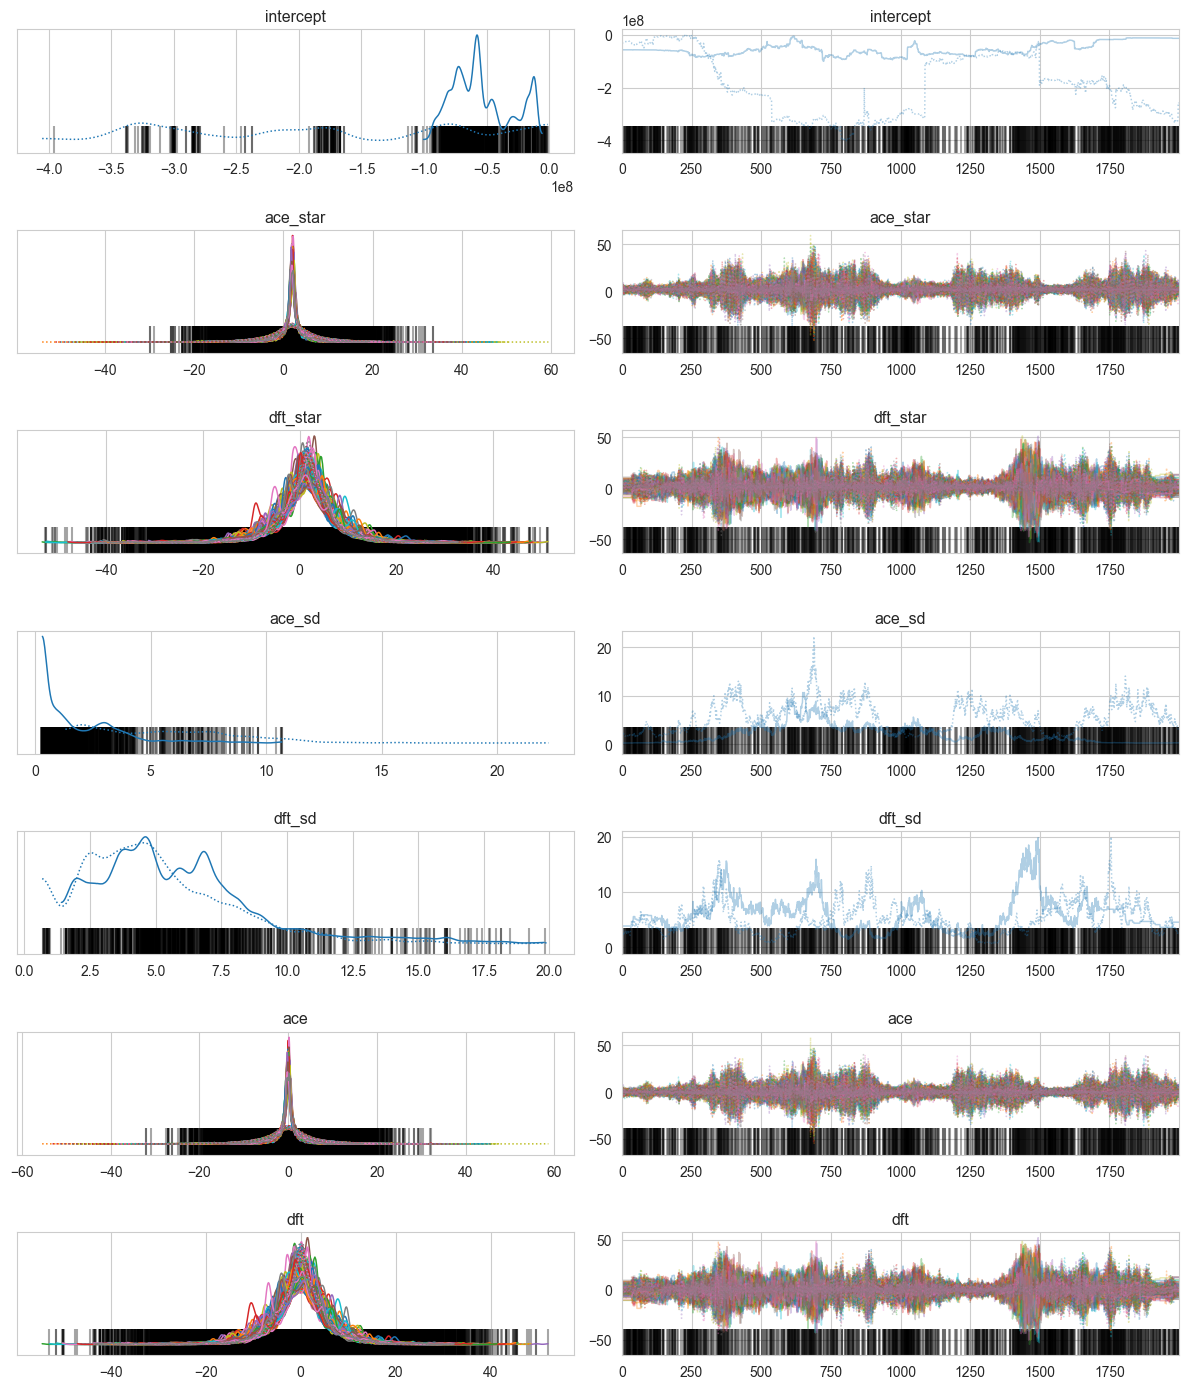


Summary Table:
                       mean            sd        hdi_3%     hdi_97%    mcse_mean      mcse_sd  ess_bulk  ess_tail  r_hat
intercept     -1.215075e+08  1.077872e+08 -3.316937e+08 -2648567.54  50496093.27  38279498.13      6.54     12.45   1.38
ace_star[0]    1.900000e+00  4.840000e+00 -7.640000e+00       11.47         0.08         0.47   2995.81    138.21   1.15
ace_star[1]    1.890000e+00  4.760000e+00 -8.950000e+00       10.95         0.08         0.55   2808.05    116.53   1.17
ace_star[2]    2.000000e+00  5.030000e+00 -8.620000e+00       12.01         0.08         0.46   3482.87    243.08   1.14
ace_star[3]    1.920000e+00  4.990000e+00 -7.840000e+00       11.62         0.09         0.39   2867.47    148.69   1.15
ace_star[4]    2.020000e+00  4.840000e+00 -7.660000e+00       12.44         0.09         0.44   2358.62    249.84   1.14
ace_star[5]    2.020000e+00  5.060000e+00 -7.430000e+00       13.01         0.09         0.53   2834.07    263.09   1.18
ace_star[6]    2

In [166]:
with AceDoubleFault:
    trace_AD = pm.sample(tune=1000, draws=2000, chains=2, cores=2)

    # Plot the trace
    plt.figure(figsize=(10, 6))
    az.plot_trace(trace_AD)
    plt.tight_layout()
    plt.show()

    # Get the summary table
    AD_summary = az.summary(trace_AD, round_to=2)

    # Print the summary table
    print('\nSummary Table:')
    print(AD_summary.to_string())


<AxesSubplot: >

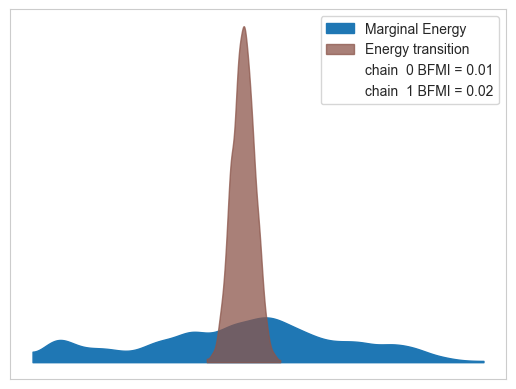

In [167]:
# Plot the energy
az.plot_energy(trace_AD)

It seems like the parameter in this simulation still needs optimization!

[Text(0, 0.0, 'Juan Pablo Varillas'),
 Text(0, 2.475, 'Zhizhen Zhang'),
 Text(0, 4.950000000000001, 'Zizou Bergs'),
 Text(0, 7.425000000000001, 'Laurent Lokoli'),
 Text(0, 9.9, 'Marc Andrea Huesler'),
 Text(0, 12.375, 'Chun Hsin Tseng'),
 Text(0, 14.85, 'Pavel Kotov'),
 Text(0, 17.325, 'Max Purcell'),
 Text(0, 19.8, 'Yu Hsiou Hsu'),
 Text(0, 22.275000000000002, 'Oleksii Krutykh'),
 Text(0, 24.750000000000004, 'Mattia Bellucci'),
 Text(0, 27.225000000000005, 'Luca Van Assche'),
 Text(0, 29.700000000000006, 'Yannick Hanfmann'),
 Text(0, 32.175000000000004, 'Quentin Halys'),
 Text(0, 34.650000000000006, 'Tomas Martin Etcheverry'),
 Text(0, 37.12500000000001, 'Aleksandar Vukic'),
 Text(0, 39.60000000000001, 'Enzo Couacaud'),
 Text(0, 42.07500000000001, 'Facundo Bagnis'),
 Text(0, 44.55000000000001, 'Dalibor Svrcina'),
 Text(0, 47.02500000000001, 'Thiago Monteiro'),
 Text(0, 49.500000000000014, 'Tomas Machac'),
 Text(0, 51.975000000000016, 'Christopher Oconnell'),
 Text(0, 54.45000000000002

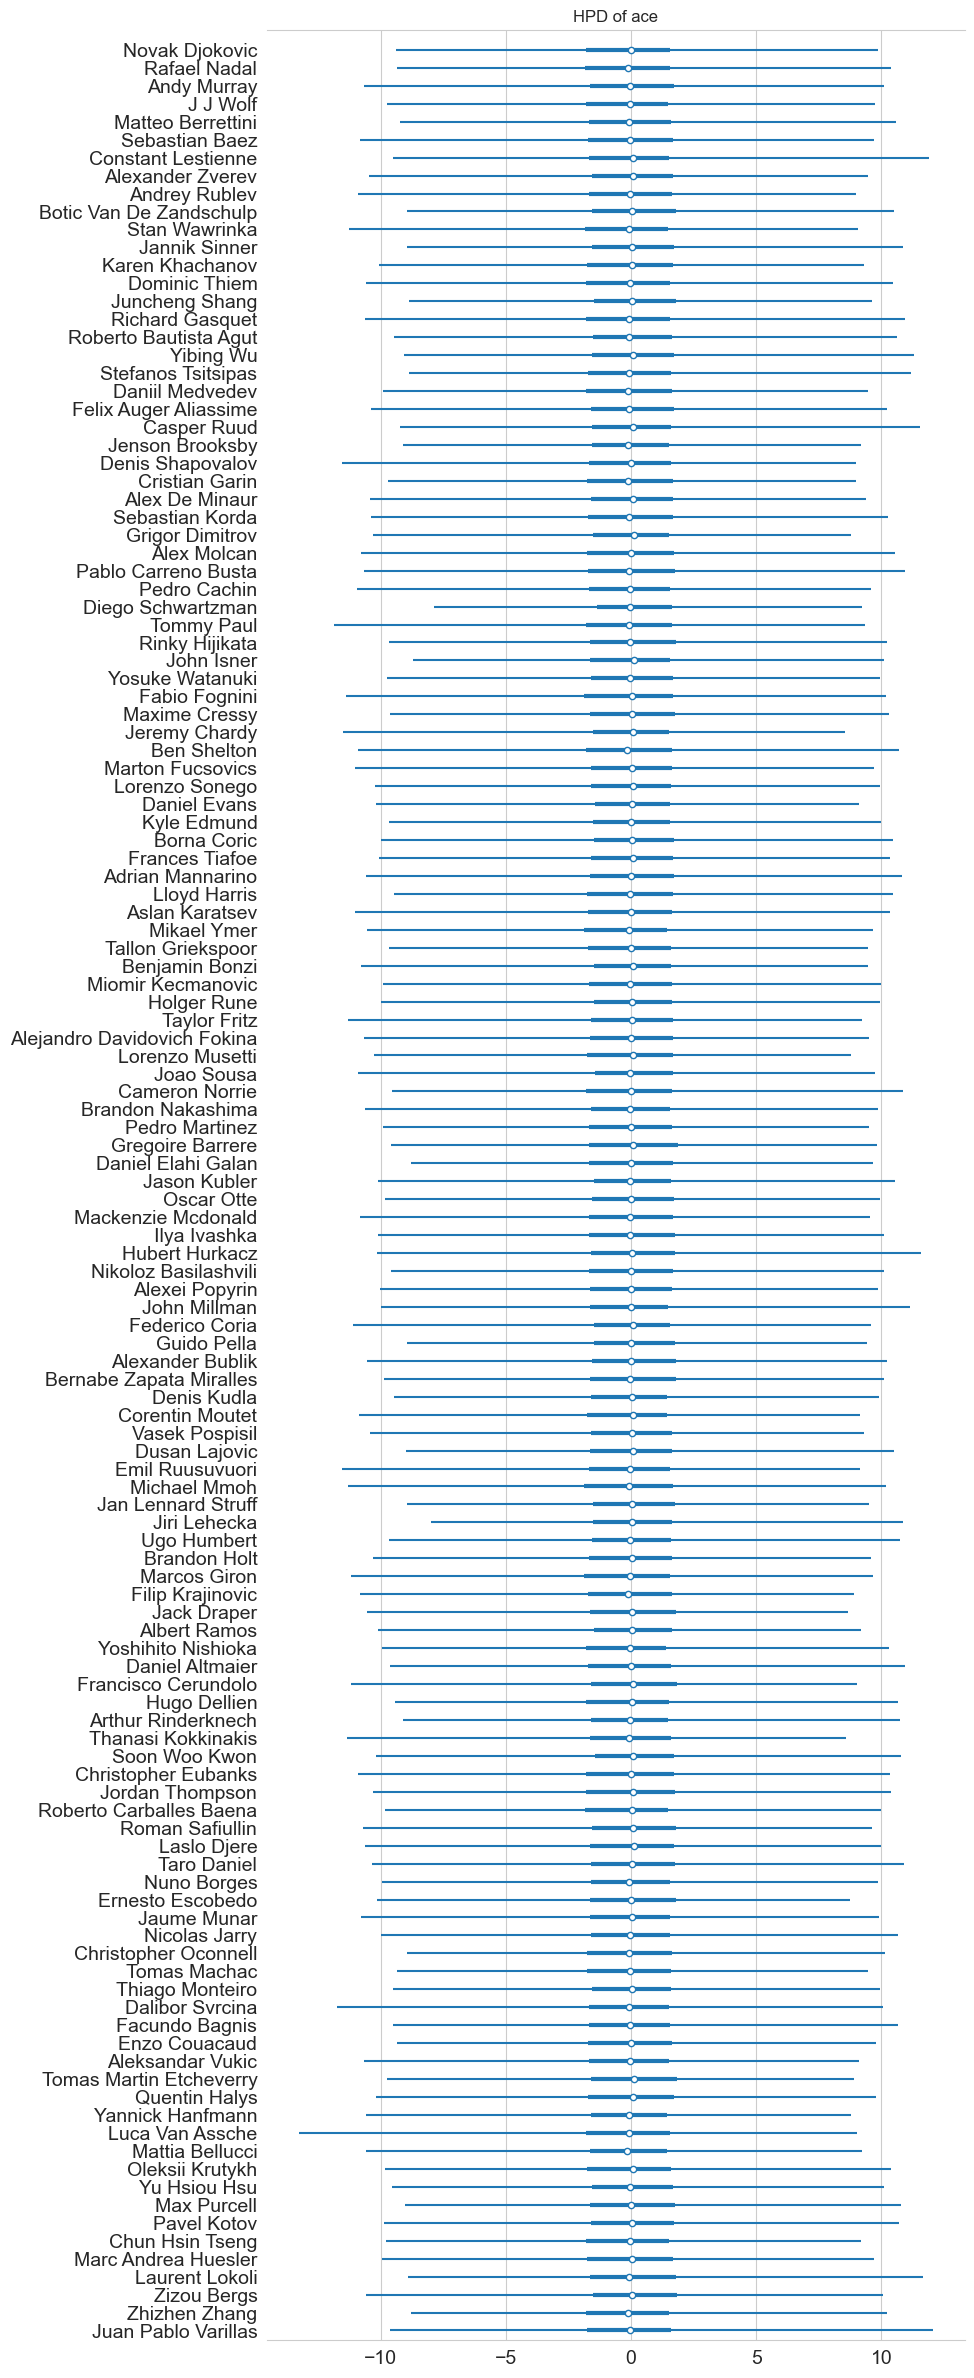

In [168]:

with AceDoubleFault:
    #az.plot_forest(trace_1, var_names=['drvs'], combined=True)
    axes_1 = az.plot_forest(trace_AD,
                           kind='forestplot',
                           var_names=['ace'],
                           combined=True,
                           figsize=(9, 30))
                           
axes_1[0].set_title('HPD of ace')
labels = [i for i in df_players_2023['name']]
labels.reverse()
axes_1[0].set_yticklabels(labels)

[Text(0, 0.0, 'Juan Pablo Varillas'),
 Text(0, 2.475, 'Zhizhen Zhang'),
 Text(0, 4.950000000000001, 'Zizou Bergs'),
 Text(0, 7.425000000000001, 'Laurent Lokoli'),
 Text(0, 9.9, 'Marc Andrea Huesler'),
 Text(0, 12.375, 'Chun Hsin Tseng'),
 Text(0, 14.85, 'Pavel Kotov'),
 Text(0, 17.325, 'Max Purcell'),
 Text(0, 19.8, 'Yu Hsiou Hsu'),
 Text(0, 22.275000000000002, 'Oleksii Krutykh'),
 Text(0, 24.750000000000004, 'Mattia Bellucci'),
 Text(0, 27.225000000000005, 'Luca Van Assche'),
 Text(0, 29.700000000000006, 'Yannick Hanfmann'),
 Text(0, 32.175000000000004, 'Quentin Halys'),
 Text(0, 34.650000000000006, 'Tomas Martin Etcheverry'),
 Text(0, 37.12500000000001, 'Aleksandar Vukic'),
 Text(0, 39.60000000000001, 'Enzo Couacaud'),
 Text(0, 42.07500000000001, 'Facundo Bagnis'),
 Text(0, 44.55000000000001, 'Dalibor Svrcina'),
 Text(0, 47.02500000000001, 'Thiago Monteiro'),
 Text(0, 49.500000000000014, 'Tomas Machac'),
 Text(0, 51.975000000000016, 'Christopher Oconnell'),
 Text(0, 54.45000000000002

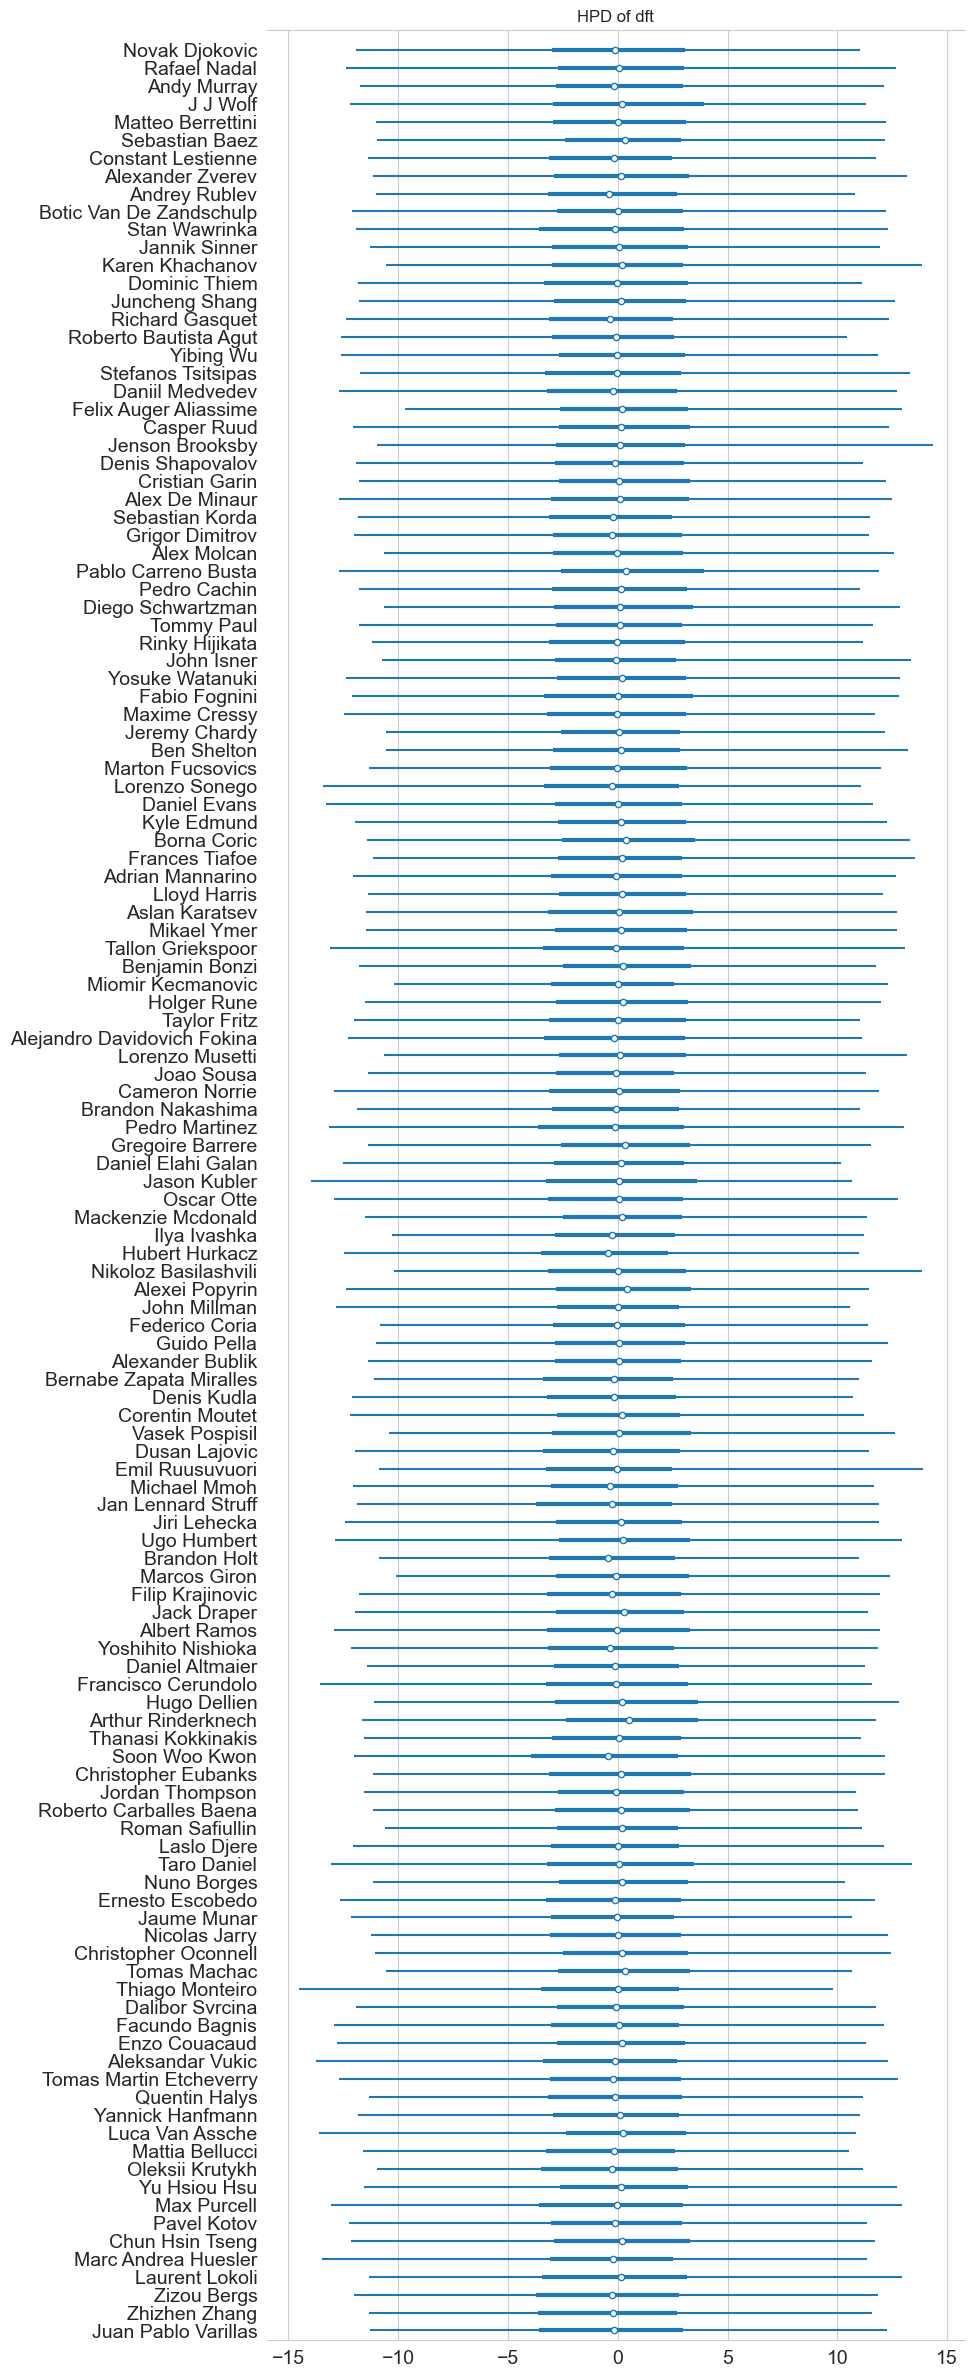

In [169]:
# From model posteriors, plot driver talent *and* constructor strength with *and* without the constraint above, 
# *with* **credible intervals**, so you have uncertainty quantification of your estimate of cars' strengths.
with AceDoubleFault:
    #az.plot_forest(trace_1, var_names=['drvs'], combined=True)
    axes_1 = az.plot_forest(trace_AD,
                           kind='forestplot',
                           var_names=['dft'],
                           combined=True,
                           figsize=(9, 30))
                           
axes_1[0].set_title('HPD of dft')
labels = [i for i in df_players_2023['name']]
labels.reverse()
axes_1[0].set_yticklabels(labels)

c:\Users\samwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (128) in plot_posterior, generating only 40 plots
  warnings.warn(


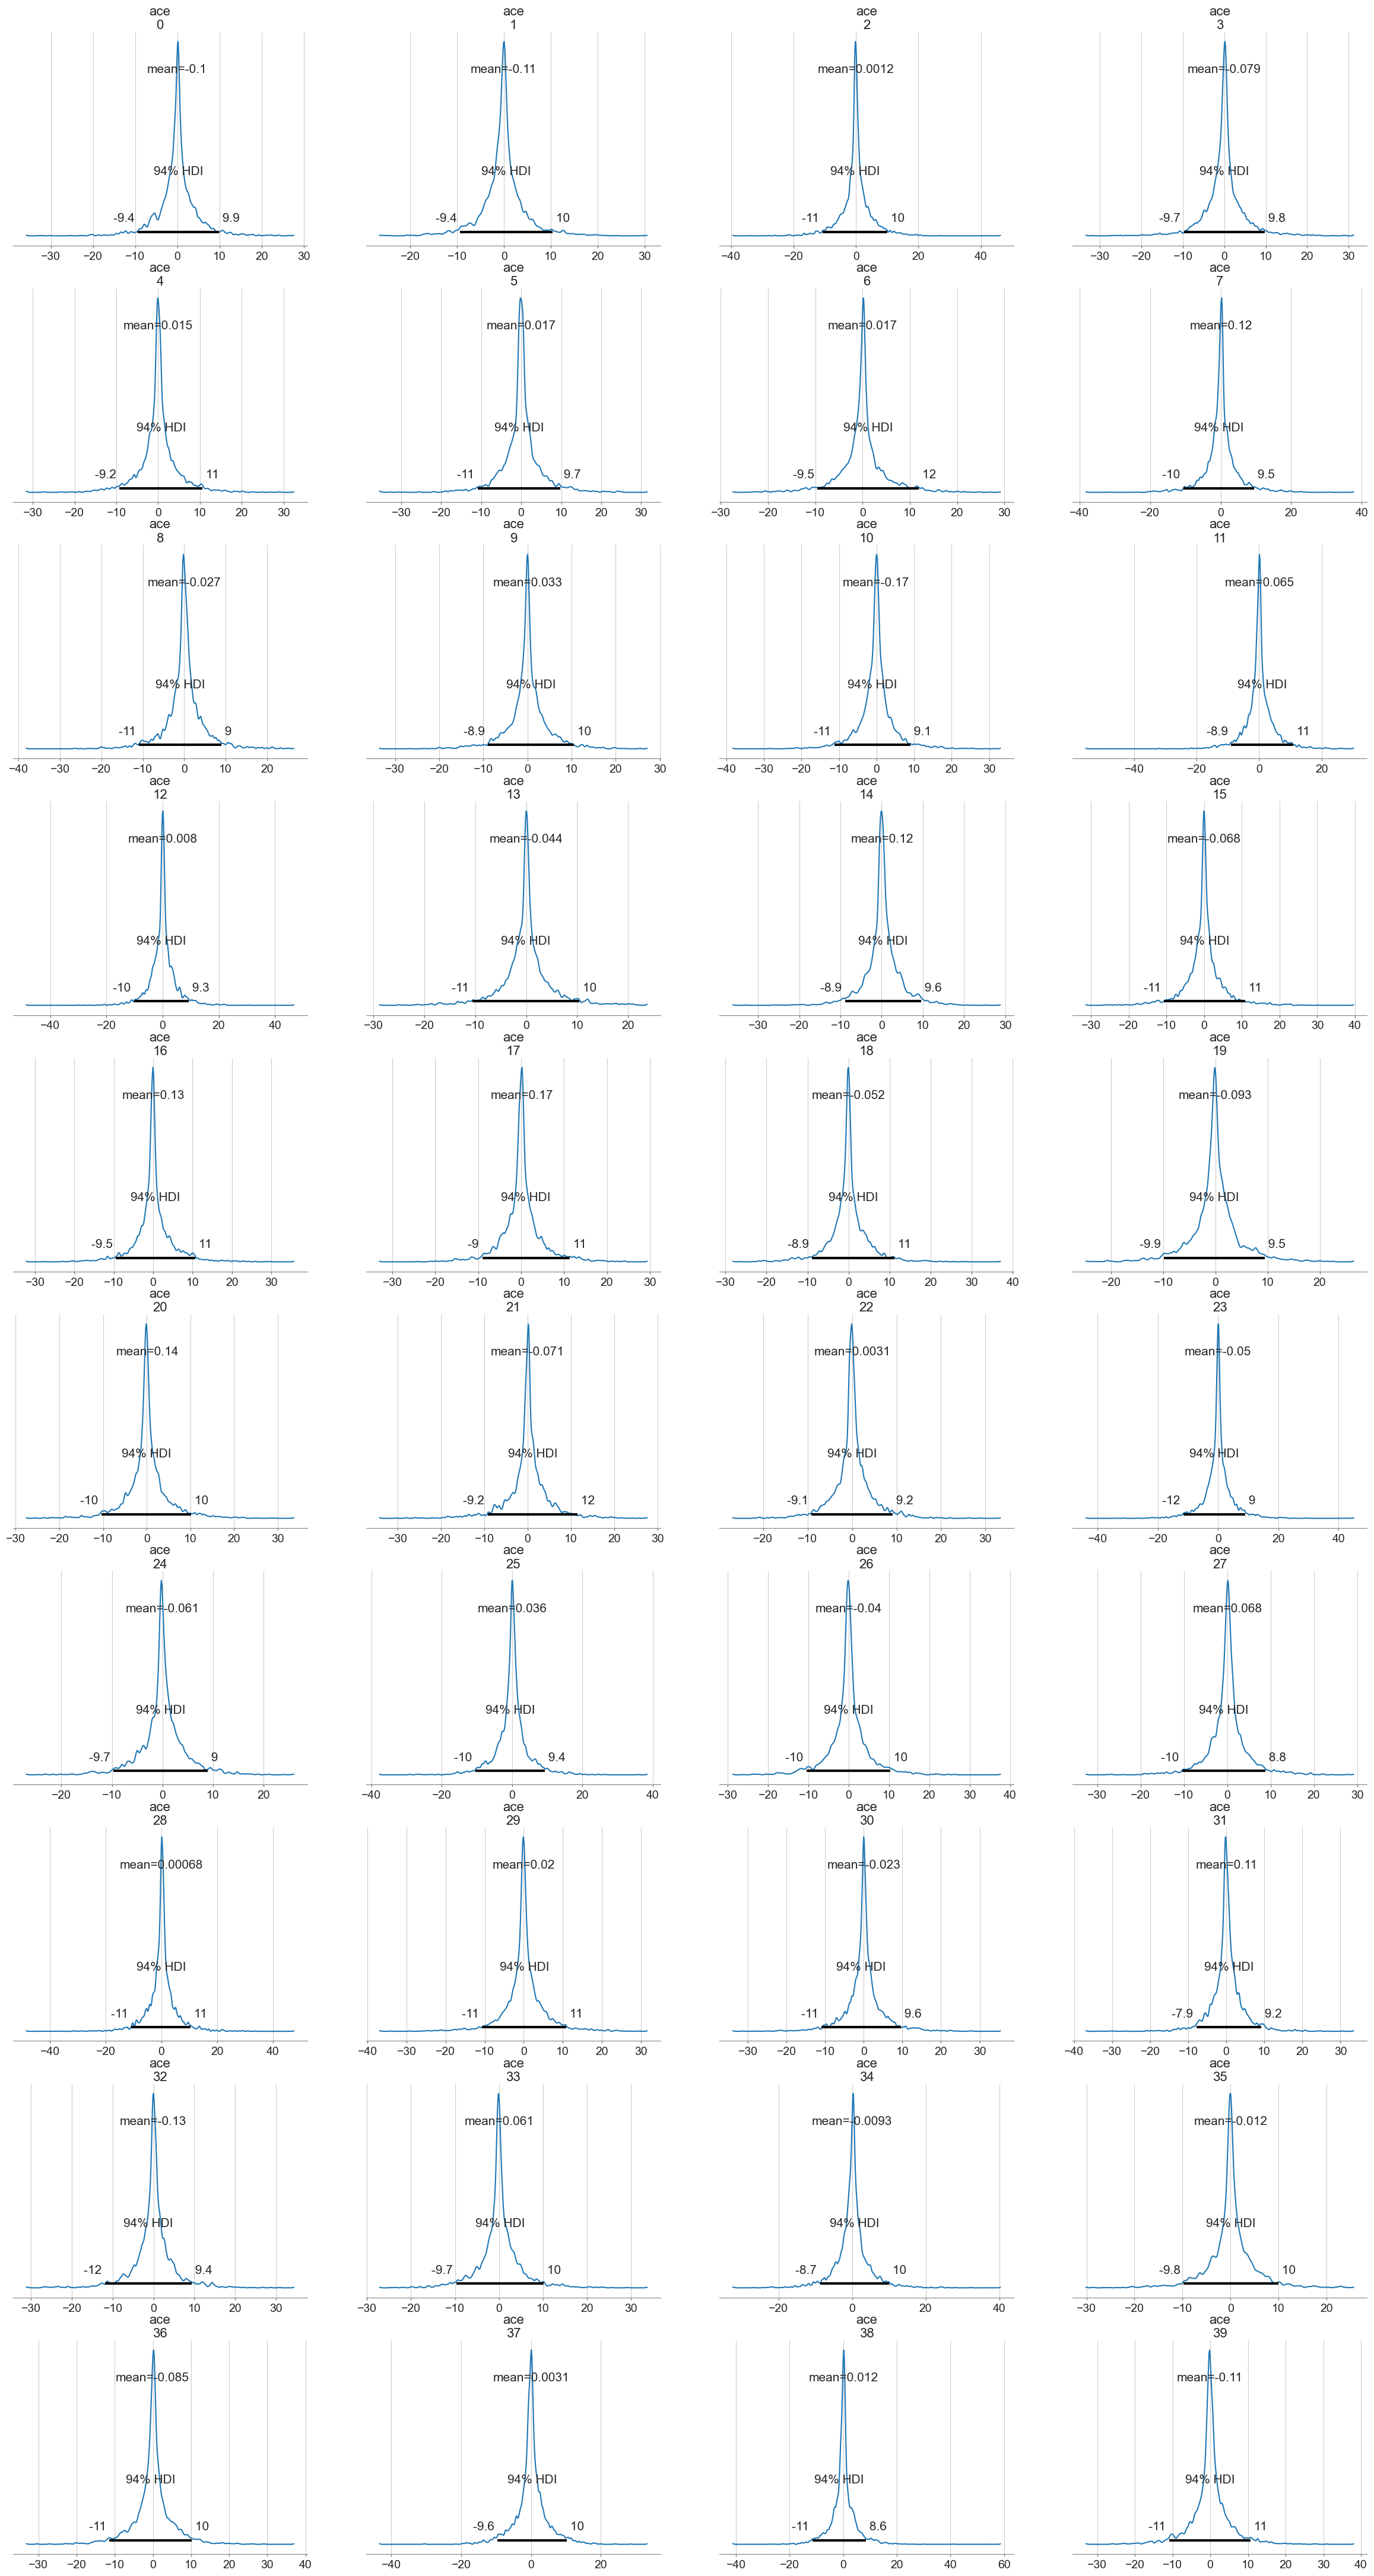

In [174]:
with AceDoubleFault:
    axes_3=az.plot_posterior(trace_AD, var_names=['ace'])

From the graph above, we can see that neither 'ace' nor 'dft' (double fault) record affects the win rate too much. Their contribution to the win rate are both fluctuating around 0. </br>
It's a 'disappointing' result.</br>
But it was reasonable as well. </br>
'Ace' is for sure great, but it appears occassionally. We are sure that its chance increases when a player is more skillful and aggressive.</br>
'Double fault' is frustrating. But it is not the main reason for losing the game, as well.</br>


# ***Part 3, 4 Factors tennis***


As we have studied the effect of Ace and Double Fault, we would like to take a look at how other facts would affect the win rate</br>
**Game play related records:**</br>
w_ace: The number of aces hit by the winning player.</br>
w_df: The number of double faults hit by the winning player.</br>
w_svpt: The number of service points played by the winning player.</br>
w_1stIn: The percentage of first serves that landed in for the winning player.</br>
w_1stWon: The percentage of first serve points won by the winning player.</br>
w_2ndWon: The percentage of second serve points won by the winning player.</br>
w_SvGms: The number of service games won by the winning player.</br>
w_bpSaved: The number of break points saved by the winning player.</br>
w_bpFaced: The number of break points faced by the winning player.</br>


We see that there are 4 percentages that is important for us to look into</br>
***p_1stIn:*** The percentage of first serves that landed in for the winning player.</br> 
This tells us about the reliability of his serving</br>
***p_1stWon:*** The percentage of first serve points won by the winning player.</br>
This tells us about his ability of playing offensively</br>
***p_2ndWon:*** The percentage of second serve points won by the winning player.</br>
This tells us about his ability of playing deffensively</br>
***p_bpSaved:*** =bpSaved/bpFaced, </br>
This tells us about his in game experience and will power</br>


We will use Binomial regression a genralized Linear model (GLM), to study the importance of these 4 facts 

In [171]:
# Getting the data, we will focus on the 2021 Wimbledon players, but we will use their history data 
# Get the url of files since 2000
url_atp_matches=["https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/" + file_name for file_name in files]
# Build a huge data frame of all the games since 2000
df_single_G_since_2000 = pd.concat([pd.read_csv(url) for url in url_atp_matches])
# narrow down to all the G level games
df_single_G_since_2000 = df_single_G_since_2000.loc[df_single_G_since_2000["tourney_level"]=='G',:]
# check the size again
print('There are ', len(df_single_G_since_2000),' grand slam G -level tennis game records since 2020')


There are  11684  grand slam G -level tennis game records since 2020


In [172]:
# get the players would joined 2021 Wimbledon
df_games_2021=df_single_G_since_2000.loc[df_single_G_since_2000['tourney_id']=='2021-540',:]
df_winners_Wimbledon_2021=df_games_2021[['winner_name','winner_id']].groupby(['winner_id']).max()
df_winners_Wimbledon_2021=df_winners_Wimbledon_2021.set_axis(['name'], axis=1)
df_winners_Wimbledon_2021.index.name='id'
df_losers_Wimbledon_2021=df_games_2021[['loser_name','loser_id']].groupby(['loser_id']).max()
df_losers_Wimbledon_2021=df_losers_Wimbledon_2021.set_axis(['name'], axis=1)
df_losers_Wimbledon_2021.index.name='id'
df_players_Wimbledon_2021=pd.concat([df_winners_Wimbledon_2021,df_losers_Wimbledon_2021],axis=0)
df_players_Wimbledon_2021=df_players_Wimbledon_2021.drop_duplicates('name')
df_players_Wimbledon_2021

name
id                       
100644   Alexander Zverev
103819      Roger Federer
104312      Andreas Seppi
104665      Pablo Andujar
104731     Kevin Anderson
...                   ...
200615     Alexei Popyrin
206173      Jannik Sinner
206909  Brandon Nakashima
207518    Lorenzo Musetti
207733        Jack Draper

[128 rows x 1 columns]

In [193]:
#Get the history win rate of these players, 
# we still have the history record in the data frame df_players
df_players_winrate_avg

wins_rate
player_id           
210530      0.000001
210234      0.711449
210097      0.580248
210013      0.118330
209414      0.000001
...              ...
101320      0.349281
101185      0.349781
101150      0.570425
101086      0.278226
100644      0.747245

[869 rows x 1 columns]

In [220]:
df_winrate_Wimbledon_2021=pd.concat([df_players_Wimbledon_2021,df_players_winrate_avg],axis=1, join='inner')
df_winrate_Wimbledon_2021=df_winrate_Wimbledon_2021.sort_values(by='wins_rate',ascending=False,)
df_winrate_Wimbledon_2021.rename(columns={"wins_rate": "win_rate"}, inplace=True)
df_winrate_Wimbledon_2021

name  win_rate
104925      Novak Djokovic  0.883160
103819       Roger Federer  0.848315
207989      Carlos Alcaraz  0.814105
104918         Andy Murray  0.798811
105453       Kei Nishikori  0.771961
...                    ...       ...
106034   Yasutaka Uchiyama  0.000001
144642  Tomas Barrios Vera  0.000001
111190       Zhizhen Zhang  0.000001
109054        Daniel Masur  0.000001
105155         Pedro Sousa  0.000001

[128 rows x 2 columns]

In [201]:
# Now Get their history record of '1st_in', '1st_won','2nd_won' (these are percentage) 'pb_saved','pb_faced' (for ratio)
df_as_winner=df_single_G_since_2000[['winner_id','w_1stIn','w_1stWon','w_2ndWon','w_bpSaved','w_bpFaced']]
df_as_winner=df_as_winner.set_axis(['id','1stIn','1stWon','2ndWon','bpSaved','bpFaced'], axis=1)
df_as_loser=df_single_G_since_2000[['loser_id','l_1stIn','l_1stWon','l_2ndWon','l_bpSaved','l_bpFaced']]
df_as_loser=df_as_loser.set_axis(['id','1stIn','1stWon','2ndWon','bpSaved','bpFaced'], axis=1)
df_4facts_win_los=pd.concat([df_as_loser,df_as_winner],axis=0)
df_4facts=df_4facts_win_los.groupby('id').mean()
df_4facts=df_4facts.fillna(0.01)
df_4facts=df_4facts.replace(0, 0.01)
df_4facts

1stIn     1stWon     2ndWon   bpSaved    bpFaced
id                                                          
100644  74.940000  56.030000  17.670000  4.660000   7.850000
101086  71.000000  44.250000  23.000000  7.250000  13.500000
101150  51.928571  39.285714  28.857143  8.214286  12.500000
101185  55.666667  38.000000  23.000000  7.333333  11.666667
101320  63.375000  41.125000  18.750000  8.125000  13.000000
...           ...        ...        ...       ...        ...
209414  41.000000  25.000000  15.000000  8.000000  15.000000
210013  61.400000  46.600000  23.000000  5.400000   8.200000
210097  86.333333  69.333333  31.500000  4.500000   6.000000
210234  77.000000  53.500000  19.500000  6.500000   9.000000
210530  74.000000  49.000000  14.000000  6.000000  12.000000

[869 rows x 5 columns]

##### We will use these players' grand slam turn out record from 2000 to be our observed data 
And we would like to continue to use the ZeroInflated Binomial distribution to model our data, therefore, the win_rate as a percentage is not a good input. Now we would change the input to the rate times 7, and taking the floor. Meaning, the most expected round a player are at least to play up to.

In [221]:
df_winrate_Wimbledon_2021

name  win_rate
104925      Novak Djokovic  0.883160
103819       Roger Federer  0.848315
207989      Carlos Alcaraz  0.814105
104918         Andy Murray  0.798811
105453       Kei Nishikori  0.771961
...                    ...       ...
106034   Yasutaka Uchiyama  0.000001
144642  Tomas Barrios Vera  0.000001
111190       Zhizhen Zhang  0.000001
109054        Daniel Masur  0.000001
105155         Pedro Sousa  0.000001

[128 rows x 2 columns]

In [222]:
df_winrate_Wimbledon_2021['win_rate']=[math.floor(i) for i in df_winrate_Wimbledon_2021['win_rate']*7]
df_winrate_Wimbledon_2021

name  win_rate
104925      Novak Djokovic         6
103819       Roger Federer         5
207989      Carlos Alcaraz         5
104918         Andy Murray         5
105453       Kei Nishikori         5
...                    ...       ...
106034   Yasutaka Uchiyama         0
144642  Tomas Barrios Vera         0
111190       Zhizhen Zhang         0
109054        Daniel Masur         0
105155         Pedro Sousa         0

[128 rows x 2 columns]

In [223]:
df_4facts_Wimbledom_2021=pd.concat([df_winrate_Wimbledon_2021,df_4facts],axis=1,join='inner')
df_4facts_Wimbledom_2021=df_4facts_Wimbledom_2021.sort_values(by='win_rate',ascending=False)
df_4facts_Wimbledom_2021

name  win_rate       1stIn     1stWon     2ndWon  \
104925           Novak Djokovic         6   64.914948  48.432990  18.889175   
100644         Alexander Zverev         5   74.940000  56.030000  17.670000   
111575          Karen Khachanov         5   73.597403  54.480519  22.766234   
206173            Jannik Sinner         5   67.404762  48.500000  24.285714   
122298  Botic Van De Zandschulp         5   69.416667  50.833333  21.208333   
...                         ...       ...         ...        ...        ...   
106034        Yasutaka Uchiyama         0   75.857143  49.714286  20.571429   
144642       Tomas Barrios Vera         0   84.000000  58.500000  15.500000   
111190            Zhizhen Zhang         0  103.333333  77.333333  28.000000   
109054             Daniel Masur         0   80.000000  57.000000  20.000000   
105155              Pedro Sousa         0   60.500000  40.250000  17.500000   

         bpSaved    bpFaced  
104925  4.097938   6.185567  
100644  4.660000   7.850000  
111575  6.038961   9.116883  
206173  5.476190   8.904762  
122298  5.708333   9.250000  
...          ...        ...  
106034  8.571429  14.142857  
144642  6.500000  10.000000  
111190  6.666667  10.666667  
109054  6.000000  10.000000  
105155  6.750000  12.000000  

[128 rows x 7 columns]

In [233]:
# Find the reasonable psi value for the zib model
veterans = len(df_winrate_Wimbledon_2021.loc[df_winrate_Wimbledon_2021['win_rate']!=0])
newbies = len(df_winrate_Wimbledon_2021.loc[df_winrate_Wimbledon_2021['win_rate']==0])
veterans/(veterans+newbies)

0.953125

In [224]:
# Now get all the required data from above
df_4facts_Wimbledom_2021['1stIn']=df_4facts_Wimbledom_2021['1stIn']/100
df_4facts_Wimbledom_2021['1stWon']=df_4facts_Wimbledom_2021['1stWon']/100
df_4facts_Wimbledom_2021['2ndWon']=df_4facts_Wimbledom_2021['2ndWon']/100
df_4facts_Wimbledom_2021['bpSavedRate']=df_4facts_Wimbledom_2021['bpSaved']/df_4facts_Wimbledom_2021['bpFaced']

In [225]:
df_4rates_Wimbledom_2021=df_4facts_Wimbledom_2021[['name','win_rate','1stIn','1stWon','2ndWon','bpSavedRate']]
df_4rates_Wimbledom_2021

name  win_rate     1stIn    1stWon    2ndWon  \
104925           Novak Djokovic         6  0.649149  0.484330  0.188892   
100644         Alexander Zverev         5  0.749400  0.560300  0.176700   
111575          Karen Khachanov         5  0.735974  0.544805  0.227662   
206173            Jannik Sinner         5  0.674048  0.485000  0.242857   
122298  Botic Van De Zandschulp         5  0.694167  0.508333  0.212083   
...                         ...       ...       ...       ...       ...   
106034        Yasutaka Uchiyama         0  0.758571  0.497143  0.205714   
144642       Tomas Barrios Vera         0  0.840000  0.585000  0.155000   
111190            Zhizhen Zhang         0  1.033333  0.773333  0.280000   
109054             Daniel Masur         0  0.800000  0.570000  0.200000   
105155              Pedro Sousa         0  0.605000  0.402500  0.175000   

        bpSavedRate  
104925     0.662500  
100644     0.593631  
111575     0.662393  
206173     0.614973  
122298     0.617117  
...             ...  
106034     0.606061  
144642     0.650000  
111190     0.625000  
109054     0.600000  
105155     0.562500  

[128 rows x 6 columns]

### Plot and Analysis

We can represent the relative importance of each factor for each player as a stacked box plot

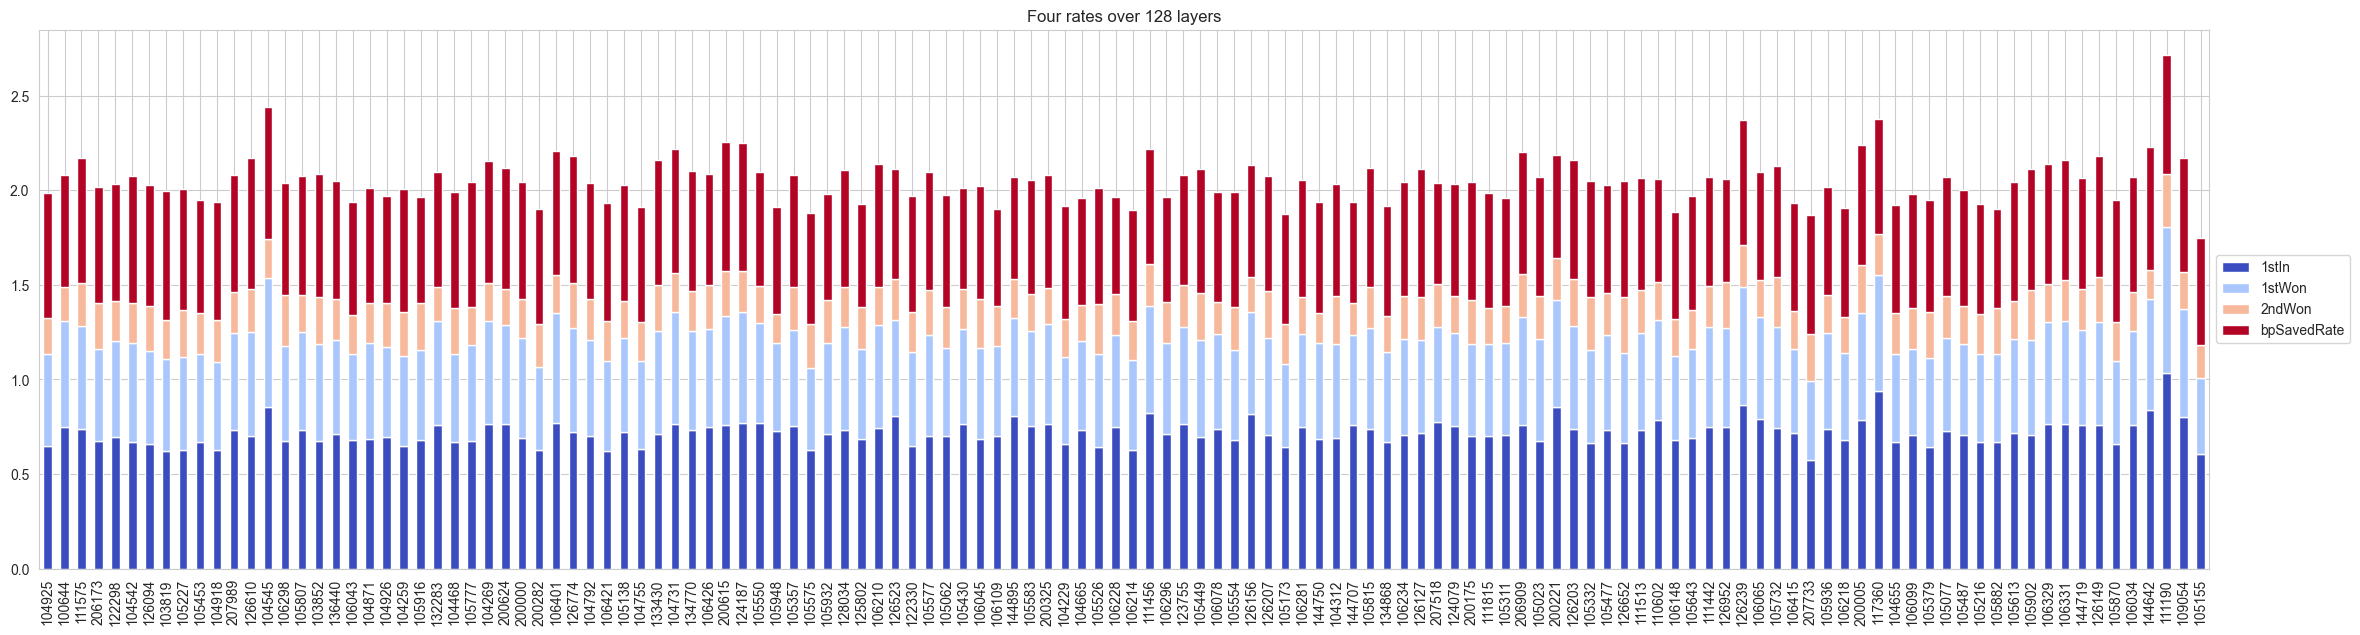

In [226]:
df_4rates_Wimbledom_2021[['1stIn','1stWon','2ndWon','bpSavedRate']].plot.bar(
    stacked=True, cmap="coolwarm",
    figsize=(28, 7),
    title="Four rates over 128 layers",
).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

We see that there are 4 percentages that is important for us to look into</br>
***p_1stIn:*** The percentage of first serves that landed in for the winning player.</br> 
This tells us about the reliability of his service</br>
***p_1stWon:*** The percentage of first serve points won by the winning player.</br>
This tells us about his ability of playing offensively</br>
***p_2ndWon:*** The percentage of second serve points won by the winning player.</br>
This tells us about his ability of playing defensively</br>
***p_bpSaved:*** =bpSaved/bpFaced, </br>
This tells us about his in game experience and will power</br>


We will use Binomial regression a genralized Linear model (GLM), to study the importance of these 4 facts 

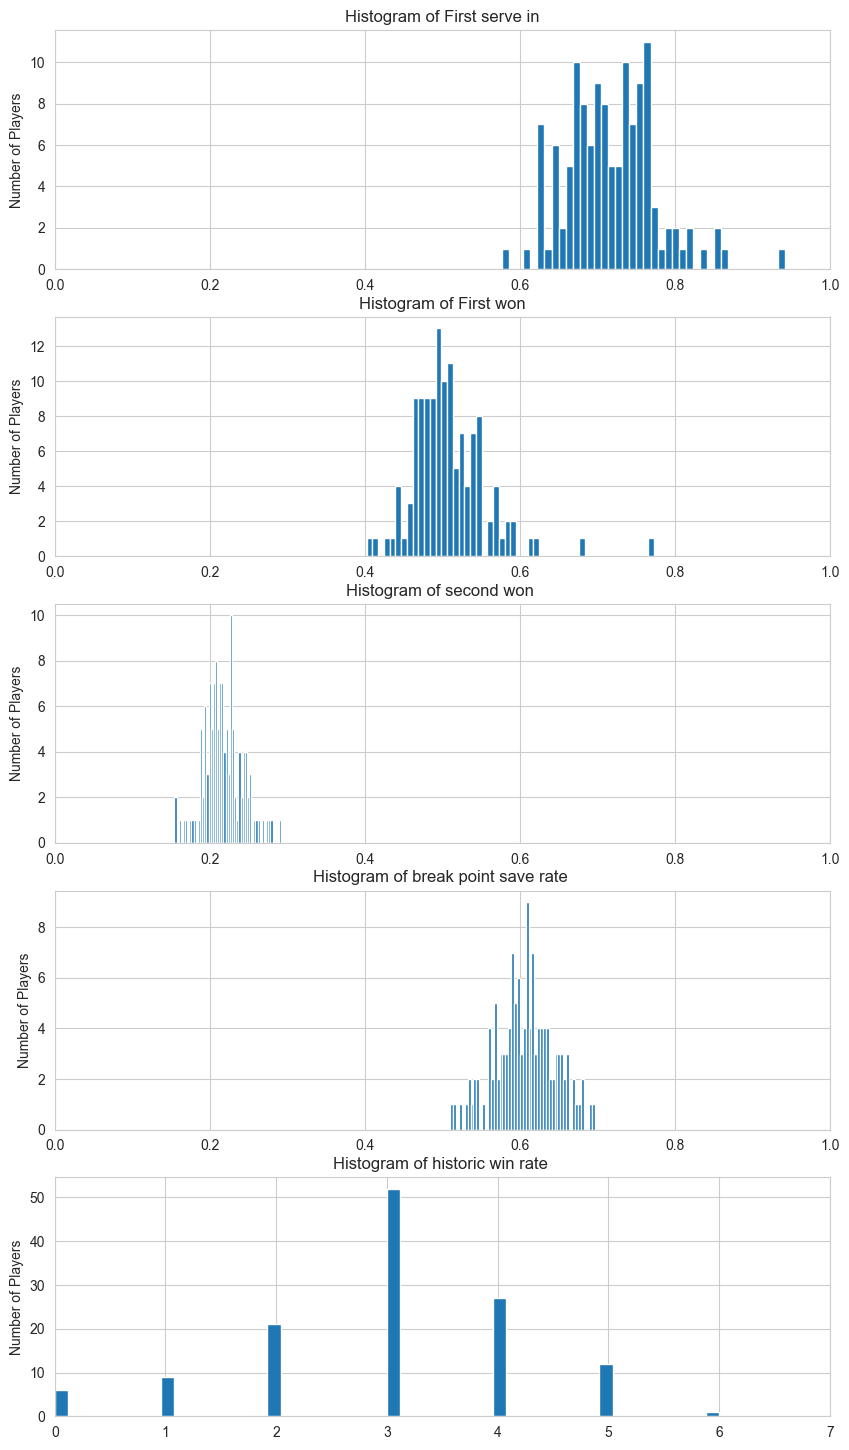

In [228]:
# Let's take a look at the distribution of ace, dft and win_rate
# Create the figure
fig, ax = plt.subplots(nrows=5, ncols=1,figsize=(10,18))

# Plot the histograms
ax[0].hist(df_4facts_Wimbledom_2021["1stIn"], bins=50)
ax[1].hist(df_4facts_Wimbledom_2021['1stWon'], bins=50)
ax[2].hist(df_4facts_Wimbledom_2021['2ndWon'], bins=50)
ax[3].hist(df_4facts_Wimbledom_2021['bpSavedRate'], bins=50)
ax[4].hist(df_4facts_Wimbledom_2021['win_rate'], bins=50)

# Set the x-limits
ax[0].set_xlim([0, 1])
ax[1].set_xlim([0, 1])
ax[2].set_xlim([0, 1])
ax[3].set_xlim([0, 1])
ax[4].set_xlim([0, 7])


# Set the titles and labels
ax[0].set_title('Histogram of First serve in')
#ax[0].set_xlabel('1stIn')
ax[0].set_ylabel('Number of Players')

ax[1].set_title('Histogram of First won')
#ax[1].set_xlabel('1stWon')
ax[1].set_ylabel('Number of Players')

ax[2].set_title('Histogram of second won ')
#ax[2].set_xlabel('2ndWon')
ax[2].set_ylabel('Number of Players')

ax[3].set_title('Histogram of break point save rate ')
#ax[3].set_xlabel('bpSavedRate')
ax[3].set_ylabel('Number of Players')

ax[4].set_title('Histogram of historic win rate ')
#ax[4].set_xlabel('win rate')
ax[4].set_ylabel('Number of Players')

fig.figsize=(28, 7)
# Show the plot
plt.show()

In [272]:
with pm.Model() as tennis_regression_model:
    # data likelihood
    FisrtIn = pm.Data("FisrtIn", df_4facts_Wimbledom_2021["1stIn"])
    FirstWon = pm.Data("FirstWon", df_4facts_Wimbledom_2021['1stWon'])
    SecondWon = pm.Data("SecondWon", df_4facts_Wimbledom_2021['2ndWon'])
    BPSaveRate = pm.Data("BPSaveRate", df_4facts_Wimbledom_2021['bpSavedRate'])
    
    # priors, all the sigma set to 1, and all the mu set to the mode in the histogram
    beta_i = pm.Normal("beta_i", mu=0, sigma=1)
    beta_FisrtIn = pm.Normal("beta_FisrtIn", mu=0, sigma=1)
    beta_FirstWon = pm.Normal("beta_FirstWon", mu=0, sigma=1)
    beta_SecondWon = pm.Normal("beta_SecondWon", mu=0, sigma=1)
    beta_BPSaveRate = pm.Normal("beta_BPSaveRate", mu=0, sigma=1)
    
    
    # linear model
    mu = beta_i + beta_FisrtIn * FisrtIn + beta_FirstWon * FirstWon + beta_SecondWon * SecondWon + beta_BPSaveRate * BPSaveRate
    p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    posterior_Wimbledon2021 = pm.ZeroInflatedBinomial('posterior_Wimbledon2021', psi=0.95, p=p, n=7, observed = df_4facts_Wimbledom_2021['win_rate'])


c:\Users\samwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pymc\data.py:406: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


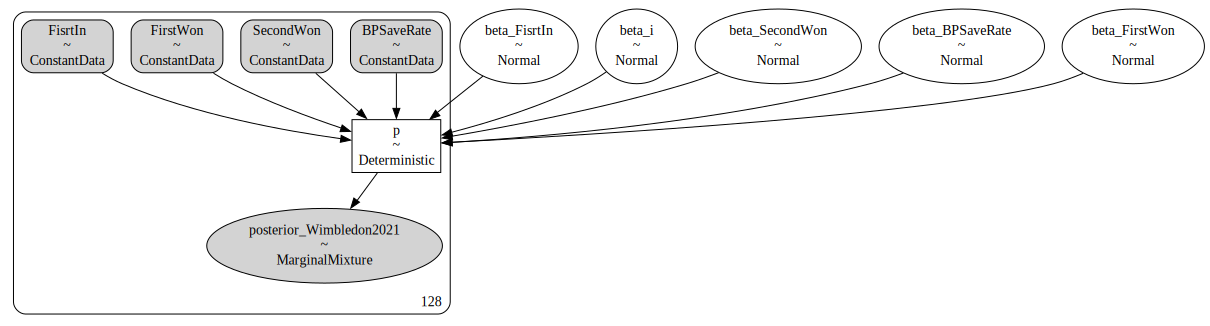

In [273]:
pm.model_to_graphviz(tennis_regression_model)

In [274]:
with tennis_regression_model:
    cdata = pm.sample(1000, tune=2000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 100 seconds.


In [295]:
# Do a posterior predictive check
with tennis_regression_model:
    # prior analysis
    prior_pc = pm.sample_prior_predictive()

    # posterior predictive
    ppc = pm.sample_posterior_predictive(   trace=cdata,
                                            random_seed=1,
                                            extend_inferencedata=True
                                              )

Sampling: [beta_BPSaveRate, beta_FirstWon, beta_FisrtIn, beta_SecondWon, beta_i, posterior_Wimbledon2021]
Sampling: [posterior_Wimbledon2021]


In [296]:
ppc

Inference data with groups:
	> posterior
	> posterior_predictive
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

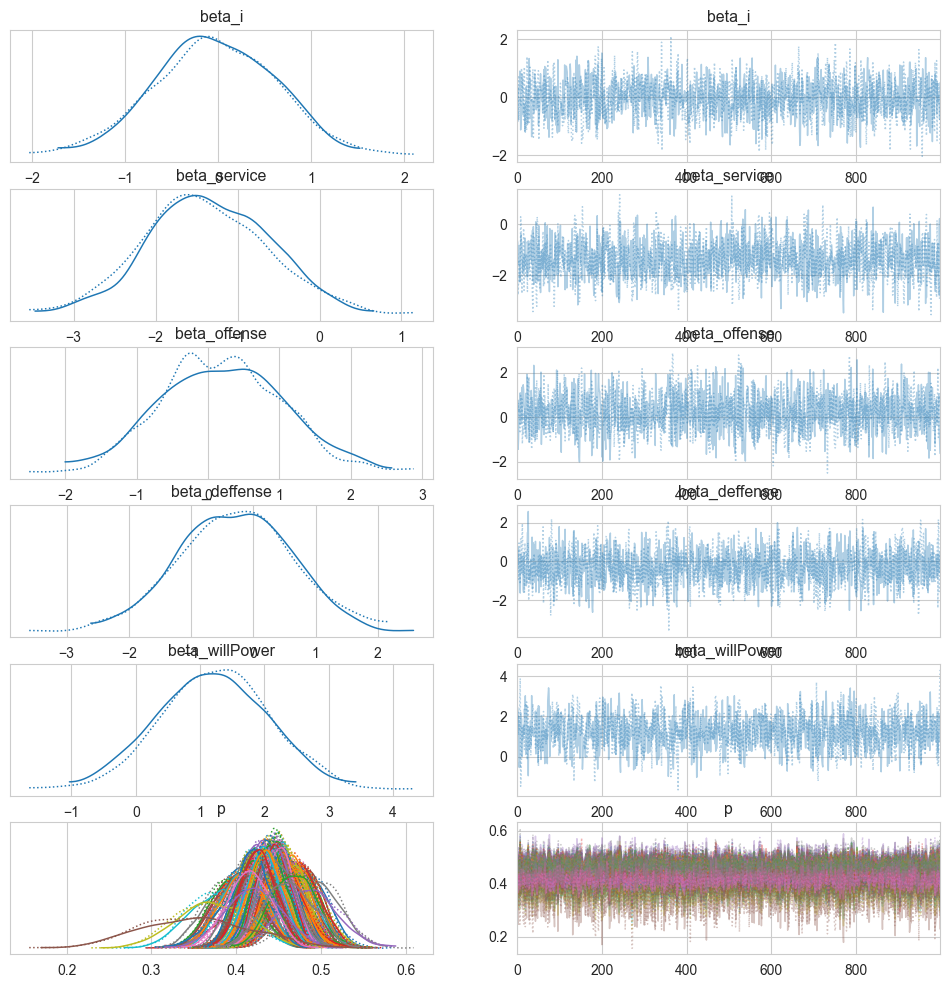

In [268]:
with tennis_regression_model:
    az.plot_trace(cdata)

In [275]:
Summary=az.summary(cdata, round_to=2)

In [301]:
Summary[0:5]

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta_i          -0.03  0.66   -1.19     1.29       0.02     0.02   1126.99   
beta_FisrtIn    -1.39  0.73   -2.85    -0.13       0.02     0.01   1291.90   
beta_FirstWon    0.23  0.85   -1.37     1.76       0.02     0.02   1457.75   
beta_SecondWon  -0.29  0.93   -2.09     1.41       0.03     0.02   1348.55   
beta_BPSaveRate  1.21  0.79   -0.18     2.73       0.02     0.01   1561.03   

                 ess_tail  r_hat  
beta_i            1218.48    1.0  
beta_FisrtIn      1229.21    1.0  
beta_FirstWon     1377.67    1.0  
beta_SecondWon    1430.64    1.0  
beta_BPSaveRate   1275.91    1.0

<AxesSubplot: >

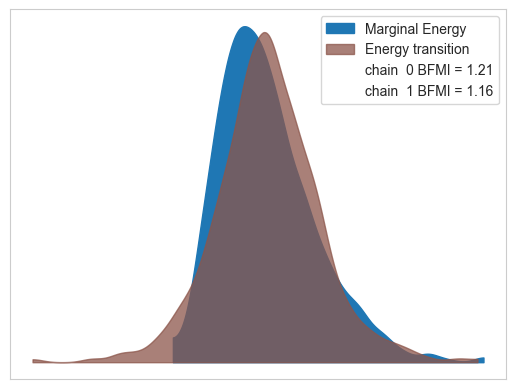

In [285]:
# Hamiltonian shows that the simulation coverged well
az.plot_energy(cdata)

Here, we can see that the mean weight of each factor is listed 

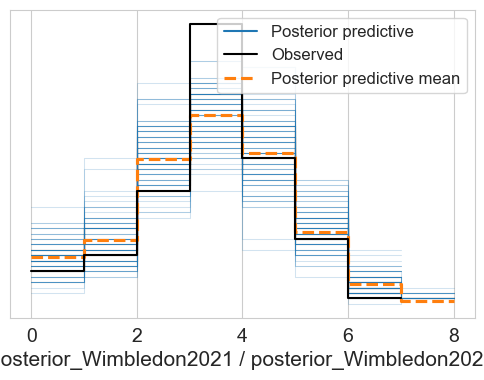

In [298]:
with tennis_regression_model:
    fig, ax = plt.subplots(figsize=(6,4))
    az.plot_ppc(data=ppc, num_pp_samples=100, group='posterior', ax=ax);
    #ax.axvline(np.mean(target), ls="--", color="r", label="True mean")
    ax.legend(fontsize=12);

The PPC test shows that it is not that easy to get to the 3rd round, the 1/16 final. </br>
In reality, more players had that capacity to make it to at least the 3rd round, showing that the players in grand slam are really good! Better than we would imagine!

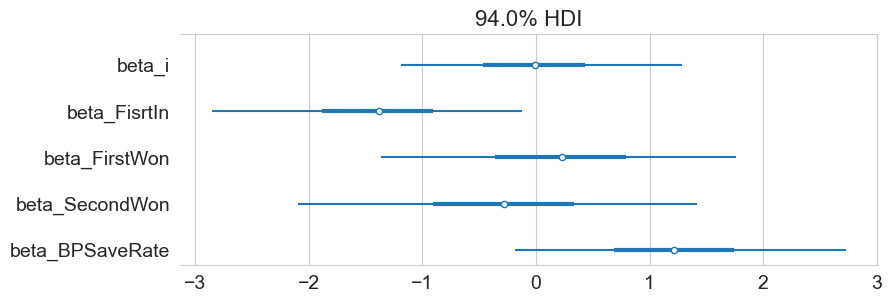

In [302]:
ax = az.plot_forest(cdata,
                    kind='forestplot',
                    var_names=['beta_i','beta_FisrtIn','beta_FirstWon','beta_SecondWon','beta_BPSaveRate'],
                    combined=True,
                    figsize=(9, 3))

This weight and corelation study shows that saving the break point is the key to the victory of a tennis game! 
It's way more imprtant than any other facts in the game!
Another important fact is to get the point on the 1st play. That requires the players to be more aggressive than conservative!


# ***Conclusion:***</br>
As for the top notch tennis players, the 4 aspects were studied:</br>
There ability to serve </br>
to play offense </br>
to play defense </br>
and their will power</br>

Based on Bayesian Model:
The 4 aspects have an influence on the win rate, beta_serving having the strongest influence. 

beta_serving is the most significant factor followed by beta_willPower, beta_offense, beta_defense, and beta_i.

Overall, the model provides evidence that the four factors have a positive impact on a player's win rate, and the strength of this impact varies depending on the specific factor being considered.

## Bibliography


#### about Data Science </br>
requests 2.28.2 </br>
https://pypi.org/project/requests/ </br>

re — Regular expression operations</br>
https://docs.python.org/3/library/re.html</br>

Exploratory Data Analysis with R    
https://medium.com/@tobikasali/exploratory-data-analysis-with-r-f0b0a5163ecd     


Utilizing Data to Predict Winners of Tennis Matches    
https://nycdatascience.com/blog/student-works/utilizing-data-to-predict-winners-of-tennis-matches/     

Adult Tournament Information   
https://www.usta.com/en/home/play/adult-tennis/programs/eastern/adult-tennis-tournament-information-and-regulations.html    

pandas.merge_asof    
https://pandas.pydata.org/docs/reference/api/pandas.merge_asof.html    


pymc.ZeroInflatedBinomial    
https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.ZeroInflatedBinomial.html    

statsmodels    
https://www.statsmodels.org/stable/index.html    

arXiv:1604.00695 [stat.ME]， Diagnosing Suboptimal Cotangent Disintegrations in Hamiltonian Monte Carlo</br>
https://doi.org/10.48550/arXiv.1604.00695</br>

Prior and Posterior Predictive Checks</br>
https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html</br>


#### about Tennis</br>

Sackmann, J. (n.d.). tennis_atp [Computer software]. GitHub. </br>
https://github.com/JeffSackmann/tennis_atp</br>

JeffSackmann/tennis_atp/matches_data_dictionary.txt</br>
https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt</br>

Welcome to US Open 101: a USOpen.org guide to how tennis works.</br>
https://www.usopen.org/en_US/us-open-at-home/how_tennis_works_us_open_101.html</br>

Wimbledon tennis tournament canceled amid coronavirus pandemic</br>
https://www.cnn.com/2020/04/01/tennis/wimbledon-canceled-coronavirus-2020-spt-intl/index.html</br>

Novak Djokovic knocked out of Wimbledon by Sam Querrey</br>
https://www.theguardian.com/sport/2016/jul/02/novak-djokovic-knocked-out-wimbledon-sam-querrey</br>

A Data Model to Track Tennis Tournaments </br>
https://vertabelo.com/blog/a-data-model-to-track-tennis-tournaments/</br>